In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#cd drive/"My Drive"/Research/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import pandas.util.testing as tm
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from xgboost import plot_tree

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup


import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

<ipython-input-3-1493a2d5f203>:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Financial_Inclusion_Final_Dataset.csv to Financial_Inclusion_Final_Dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Financial_Inclusion_Final_Dataset.csv']))

In [ ]:
df.head()

,Survey_Year,State,Sector,Residential_Area_Density,Gender,Age,Marital_status,Employment_Status,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
0,2018,Yobe,Urban,2,Female,36,Married (Monogamy),Self-employed,5,6,2,1,0,0,1,1
1,2018,FCT- Abuja,Urban,2,Male,85,Widowed,Self-employed,6,1,2,1,1,0,0,0
2,2018,Taraba,Urban,3,Male,45,Single,Employed full-time,6,3,4,1,0,0,0,1
3,2018,Anambra,Rural,2,Male,55,Married (Monogamy),Self-employed,9,4,2,1,0,0,1,1
4,2018,Yobe,Urban,3,Male,40,Married (Monogamy),Housewife,5,6,0,1,0,0,0,1


In [ ]:
print(df.describe())

        Survey_Year  Residential_Area_Density           Age  \
count  92759.000000              92759.000000  92759.000000   
mean    2012.827154                  2.150444     36.563827   
std        3.920945                  0.813327     14.972229   
min     2008.000000                  1.000000     18.000000   
25%     2010.000000                  1.000000     25.000000   
50%     2014.000000                  2.000000     33.000000   
75%     2018.000000                  3.000000     45.000000   
max     2018.000000                  3.000000     99.000000   

       Monthly_Income_Rank  Education_Level  Occupation_Score  \
count         92759.000000     92759.000000      92759.000000   
mean              4.634429         2.614830          1.323893   
std               2.800429         1.936631          0.994600   
min               1.000000         0.000000          0.000000   
25%               1.000000         1.000000          1.000000   
50%               5.000000         3.00000

In [ ]:
df.dtypes

Survey_Year                     int64
State                          object
Sector                         object
Residential_Area_Density        int64
Gender                         object
Age                             int64
Marital_status                 object
Employment_Status              object
Monthly_Income_Rank             int64
Education_Level                 int64
Occupation_Score                int64
Access_to_Mobile_Phone          int64
Access_to_Personal_Computer     int64
Access_to_Internet_or_Email     int64
Access_to_Television            int64
Bank_Status                     int64
dtype: object

In [ ]:
df.describe(include='all')

,Survey_Year,State,Sector,Residential_Area_Density,Gender,Age,Marital_status,Employment_Status,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
count,92759.000000,92759,92759,92759.000000,92759,92759.000000,92759,92759,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000
unique,NaN,37,2,NaN,2,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Katsina,Rural,NaN,Female,NaN,Married (Monogamy),Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3483,68204,NaN,46455,NaN,52744,44203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012.827154,NaN,NaN,2.150444,NaN,36.563827,NaN,NaN,4.634429,2.614830,1.323893,0.541522,0.038659,0.052976,0.488179,0.269796
std,3.920945,NaN,NaN,0.813327,NaN,14.972229,NaN,NaN,2.800429,1.936631,0.994600,0.498276,0.192783,0.223987,0.499863,0.443856
min,2008.000000,NaN,NaN,1.000000,NaN,18.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,NaN,NaN,1.000000,NaN,25.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,NaN,NaN,2.000000,NaN,33.000000,NaN,NaN,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,NaN,NaN,3.000000,NaN,45.000000,NaN,NaN,7.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
def reload_dataset():
  import io
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import train_test_split

  df = pd.read_csv(io.BytesIO(data_to_load['Financial_Inclusion_Final_Dataset.csv']))
  df.drop(['Survey_Year'], axis=1, inplace=True)

  #Create Dummy Variables
  df_encoded = pd.get_dummies(df, drop_first=True)

  #Balancing the Dataset - Undersampling

  ## Get the Banked and the Unbanked dataset
  df_encoded_banked = df_encoded[df_encoded['Bank_Status']==1]
  df_encoded_unbanked = df_encoded[df_encoded['Bank_Status']==0]

  # Class count
  count_df_encoded_unbanked, count_df_encoded_banked = df_encoded.Bank_Status.value_counts()

  # Random Undersampling
  df_encoded_unbanked_under = df_encoded_unbanked.sample(count_df_encoded_banked)
  df_encoded_under = pd.concat([df_encoded_unbanked_under, df_encoded_banked], axis=0)

  print('Random under-sampling:')
  print(df_encoded_under.Bank_Status.value_counts())
  return df_encoded_under

In [ ]:
reload_dataset()

Random under-sampling:
0    25026
1    25026
Name: Bank_Status, dtype: int64


,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status,...,Marital_status_Single,Marital_status_Widowed,Employment_Status_Employed part-time,Employment_Status_Housewife,Employment_Status_NYSC,Employment_Status_Others,Employment_Status_Pensioner/Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed
2219,3,32,6,3,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76742,3,20,6,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
24208,2,41,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
67931,2,21,1,4,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
61891,1,26,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92754,3,25,7,6,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
92755,1,46,8,2,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92756,3,60,8,5,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92757,1,58,8,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
def perf_measure(actual, prediction):
  TN, FP, FN, TP = confusion_matrix(actual, prediction).ravel()

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = round(TP/(TP+FN),3)
  print('Sensitivity, hit rate, recall, or true positive rate - TPR: {:.2f}'.format(TPR))

  # Specificity or true negative rate
  TNR = round(TN/(TN+FP),3)
  print('Specificity or true negative rate - TNR: {:.2f}'.format(TNR))

  # Precision or positive predictive value
  PPV = round(TP/(TP+FP),3)
  print('Precision or positive predictive value - PPV: {:.2f}'.format(PPV))

  # Negative predictive value
  NPV = round(TN/(TN+FN),3)
  print('Negative predictive value - NPV: {:.2f}'.format(NPV))

  # Fall out or false positive rate
  FPR = round(FP/(FP+TN),3)
  print('Fall out or false positive rate - FPR: {:.2f}'.format(FPR))

  # False negative rate
  FNR = round(FN/(TP+FN),3)
  print('False negative rate - FNR: {:.2f}'.format(FNR))

  # False discovery rate
  FDR = round(FP/(TP+FP),3)
  print('False discovery rate - FDR: {:.2f}'.format(FDR))

  # Overall accuracy
  ACC = round((TP+TN)/(TP+FP+FN+TN),3)
  print('Overall accuracy - ACC: {:.2f}'.format(ACC))

  return (TPR, TNR, PPV, NPV, FPR, FDR, ACC)

# Data Exploration

In [ ]:
df.head()

,Survey_Year,State,Sector,Residential_Area_Density,Gender,Age,Marital_status,Employment_Status,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
0,2018,Yobe,Urban,2,Female,36,Married (Monogamy),Self-employed,5,6,2,1,0,0,1,1
1,2018,FCT- Abuja,Urban,2,Male,85,Widowed,Self-employed,6,1,2,1,1,0,0,0
2,2018,Taraba,Urban,3,Male,45,Single,Employed full-time,6,3,4,1,0,0,0,1
3,2018,Anambra,Rural,2,Male,55,Married (Monogamy),Self-employed,9,4,2,1,0,0,1,1
4,2018,Yobe,Urban,3,Male,40,Married (Monogamy),Housewife,5,6,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Survey_Year                  92759 non-null  int64 
 1   State                        92759 non-null  object
 2   Sector                       92759 non-null  object
 3   Residential_Area_Density     92759 non-null  int64 
 4   Gender                       92759 non-null  object
 5   Age                          92759 non-null  int64 
 6   Marital_status               92759 non-null  object
 7   Employment_Status            92759 non-null  object
 8   Monthly_Income_Rank          92759 non-null  int64 
 9   Education_Level              92759 non-null  int64 
 10  Occupation_Score             92759 non-null  int64 
 11  Access_to_Mobile_Phone       92759 non-null  int64 
 12  Access_to_Personal_Computer  92759 non-null  int64 
 13  Access_to_Internet_or_Email  92

In [ ]:
df.describe()

,Survey_Year,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
count,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000,92759.000000
mean,2012.827154,2.150444,36.563827,4.634429,2.614830,1.323893,0.541522,0.038659,0.052976,0.488179,0.269796
std,3.920945,0.813327,14.972229,2.800429,1.936631,0.994600,0.498276,0.192783,0.223987,0.499863,0.443856
min,2008.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,1.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,2.000000,33.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,3.000000,45.000000,7.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2018.000000,3.000000,99.000000,12.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Survey_Year,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
0,2018,2,36,5,6,2,1,0,0,1,1
1,2018,2,85,6,1,2,1,1,0,0,0
2,2018,3,45,6,3,4,1,0,0,0,1
3,2018,2,55,9,4,2,1,0,0,1,1
4,2018,3,40,5,6,0,1,0,0,0,1


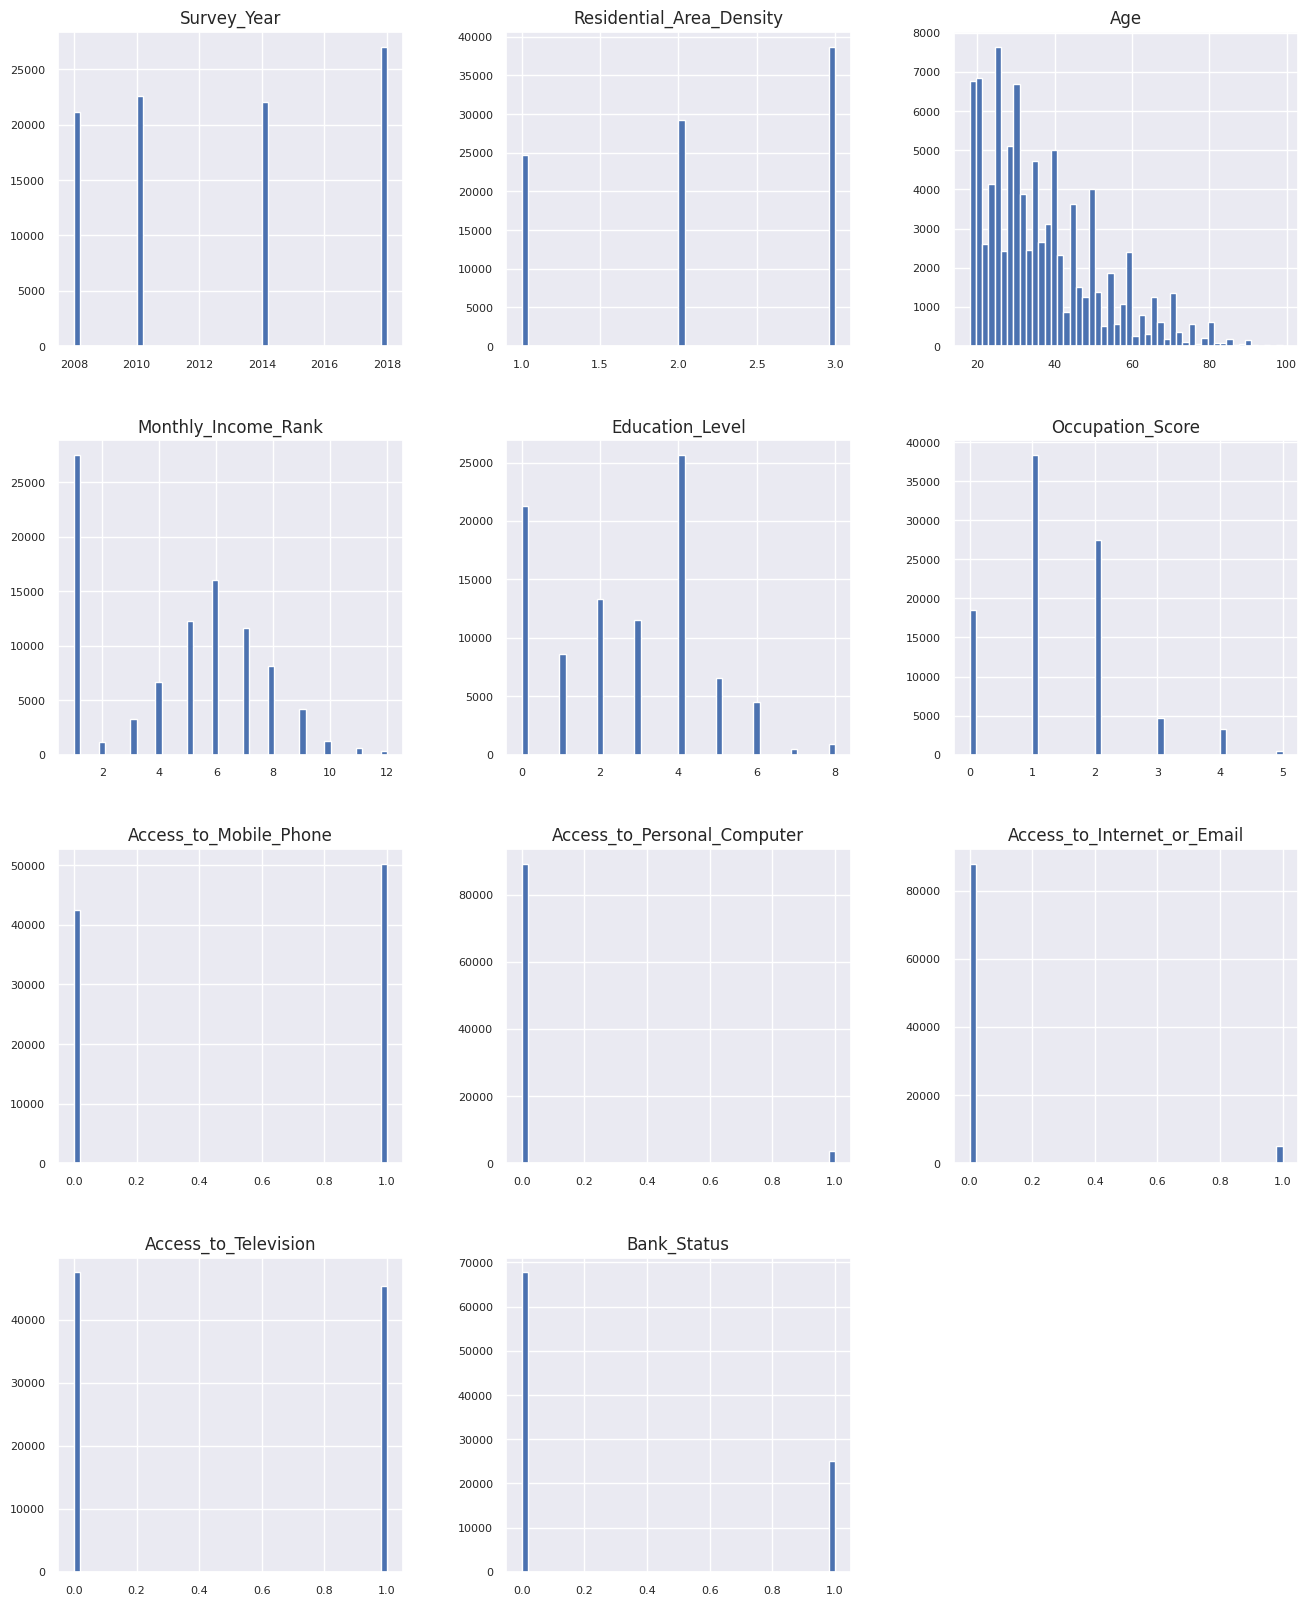

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df.drop(['Survey_Year'], axis=1, inplace=True)
df.head()

,State,Sector,Residential_Area_Density,Gender,Age,Marital_status,Employment_Status,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status
0,Yobe,Urban,2,Female,36,Married (Monogamy),Self-employed,5,6,2,1,0,0,1,1
1,FCT- Abuja,Urban,2,Male,85,Widowed,Self-employed,6,1,2,1,1,0,0,0
2,Taraba,Urban,3,Male,45,Single,Employed full-time,6,3,4,1,0,0,0,1
3,Anambra,Rural,2,Male,55,Married (Monogamy),Self-employed,9,4,2,1,0,0,1,1
4,Yobe,Urban,3,Male,40,Married (Monogamy),Housewife,5,6,0,1,0,0,0,1


In [ ]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['State', 'Sector', 'Gender', 'Marital_status', 'Employment_Status']


In [ ]:
# view the categorical variables
df[categorical].head()

,State,Sector,Gender,Marital_status,Employment_Status
0,Yobe,Urban,Female,Married (Monogamy),Self-employed
1,FCT- Abuja,Urban,Male,Widowed,Self-employed
2,Taraba,Urban,Male,Single,Employed full-time
3,Anambra,Rural,Male,Married (Monogamy),Self-employed
4,Yobe,Urban,Male,Married (Monogamy),Housewife


In [ ]:
# check missing values in categorical variables
df[categorical].isnull().sum()

State                0
Sector               0
Gender               0
Marital_status       0
Employment_Status    0
dtype: int64

In [ ]:
# print categorical variables containing missing values
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [ ]:
# view frequency distribution of categorical variables

# for var in categorical:
#    print(df[var].value_counts()/np.float(len(df)))

In [ ]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

State  contains  37  labels
Sector  contains  2  labels
Gender  contains  2  labels
Marital_status  contains  8  labels
Employment_Status  contains  9  labels


In [ ]:
# print number of labels in Location variable
print('States contains', len(df.State.unique()), 'labels')

States contains 37 labels


In [ ]:
# check labels in location variable
df.State.unique()

print(np.sort(df.State.unique()))

['Abia' 'Adamawa' 'Akwa Ibom' 'Anambra' 'Bauchi' 'Bayelsa' 'Benue' 'Borno'
 'Cross Rivers' 'Delta' 'Ebonyi' 'Edo' 'Ekiti' 'Enugu' 'FCT- Abuja'
 'Gombe' 'Imo' 'Jigawa' 'Kaduna' 'Kano' 'Katsina' 'Kebbi' 'Kogi' 'Kwara'
 'Lagos' 'Nasarawa' 'Niger' 'Ogun' 'Ondo' 'Osun' 'Oyo' 'Plateau' 'Rivers'
 'Sokoto' 'Taraba' 'Yobe' 'Zamfara']


In [ ]:
df.Sector.unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.Marital_status.unique()

array(['Married (Monogamy)', 'Widowed', 'Single', 'Co-Habiting',
       'Married (Polygamy)', 'Separated', 'Divorced', 'Refused to answer'],
      dtype=object)

# EDA - Data Visualization

<Axes: xlabel='Bank_Status', ylabel='count'>

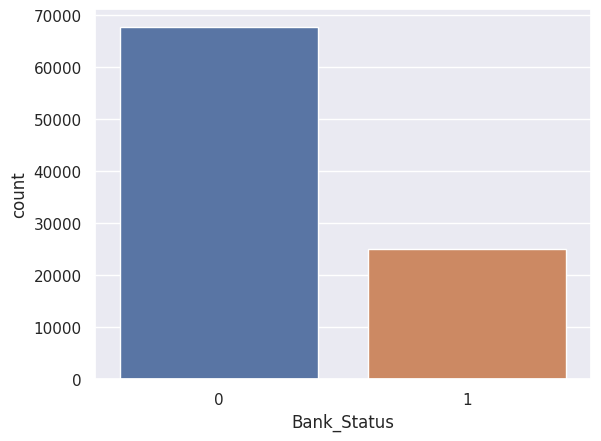

In [ ]:
sns.countplot(x='Bank_Status', data=df)

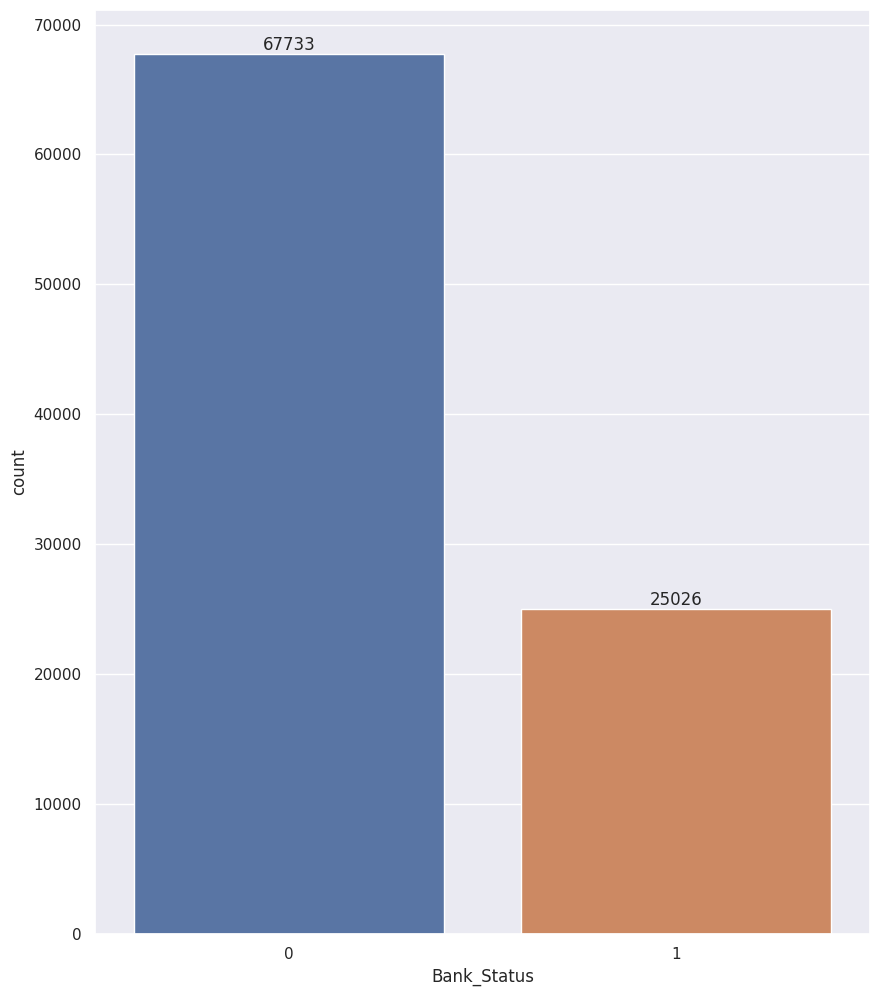

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.countplot(x='Bank_Status',  data=df)
for container in ax.containers:
    ax.bar_label(container)

<ipython-input-30-ea4e9b89bd4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"size":18})


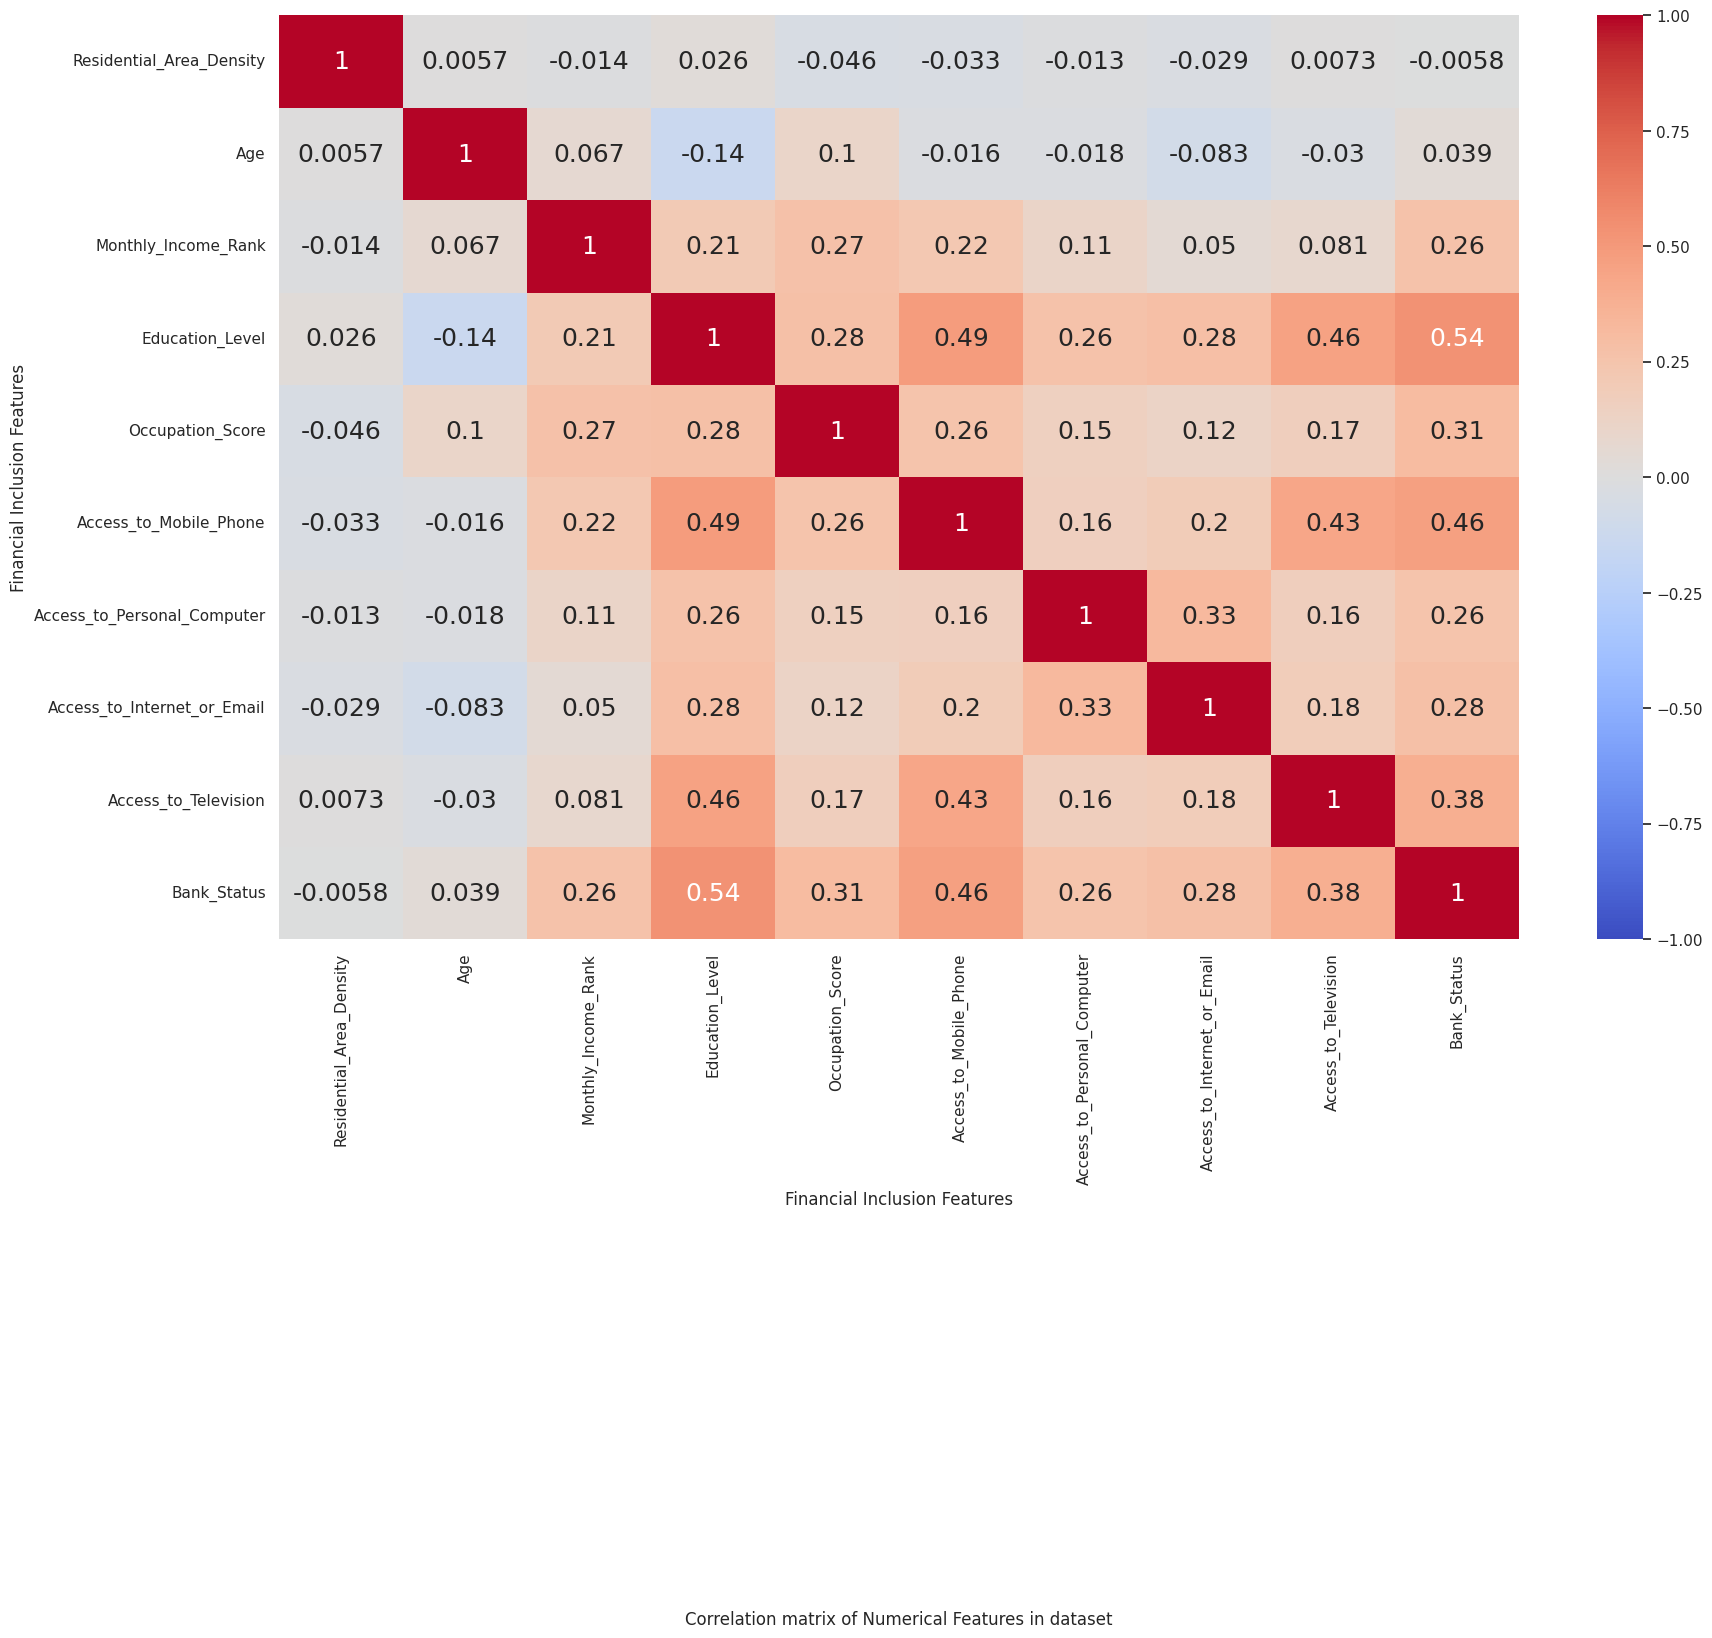

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"size":18})
plt.title("Correlation matrix of Numerical Features in dataset", y=-0.75)
plt.xlabel("Financial Inclusion Features")
plt.ylabel("Financial Inclusion Features")
plt.show()

<ipython-input-31-8fea35fe89fd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"size":20, "fontweight": 'bold'})


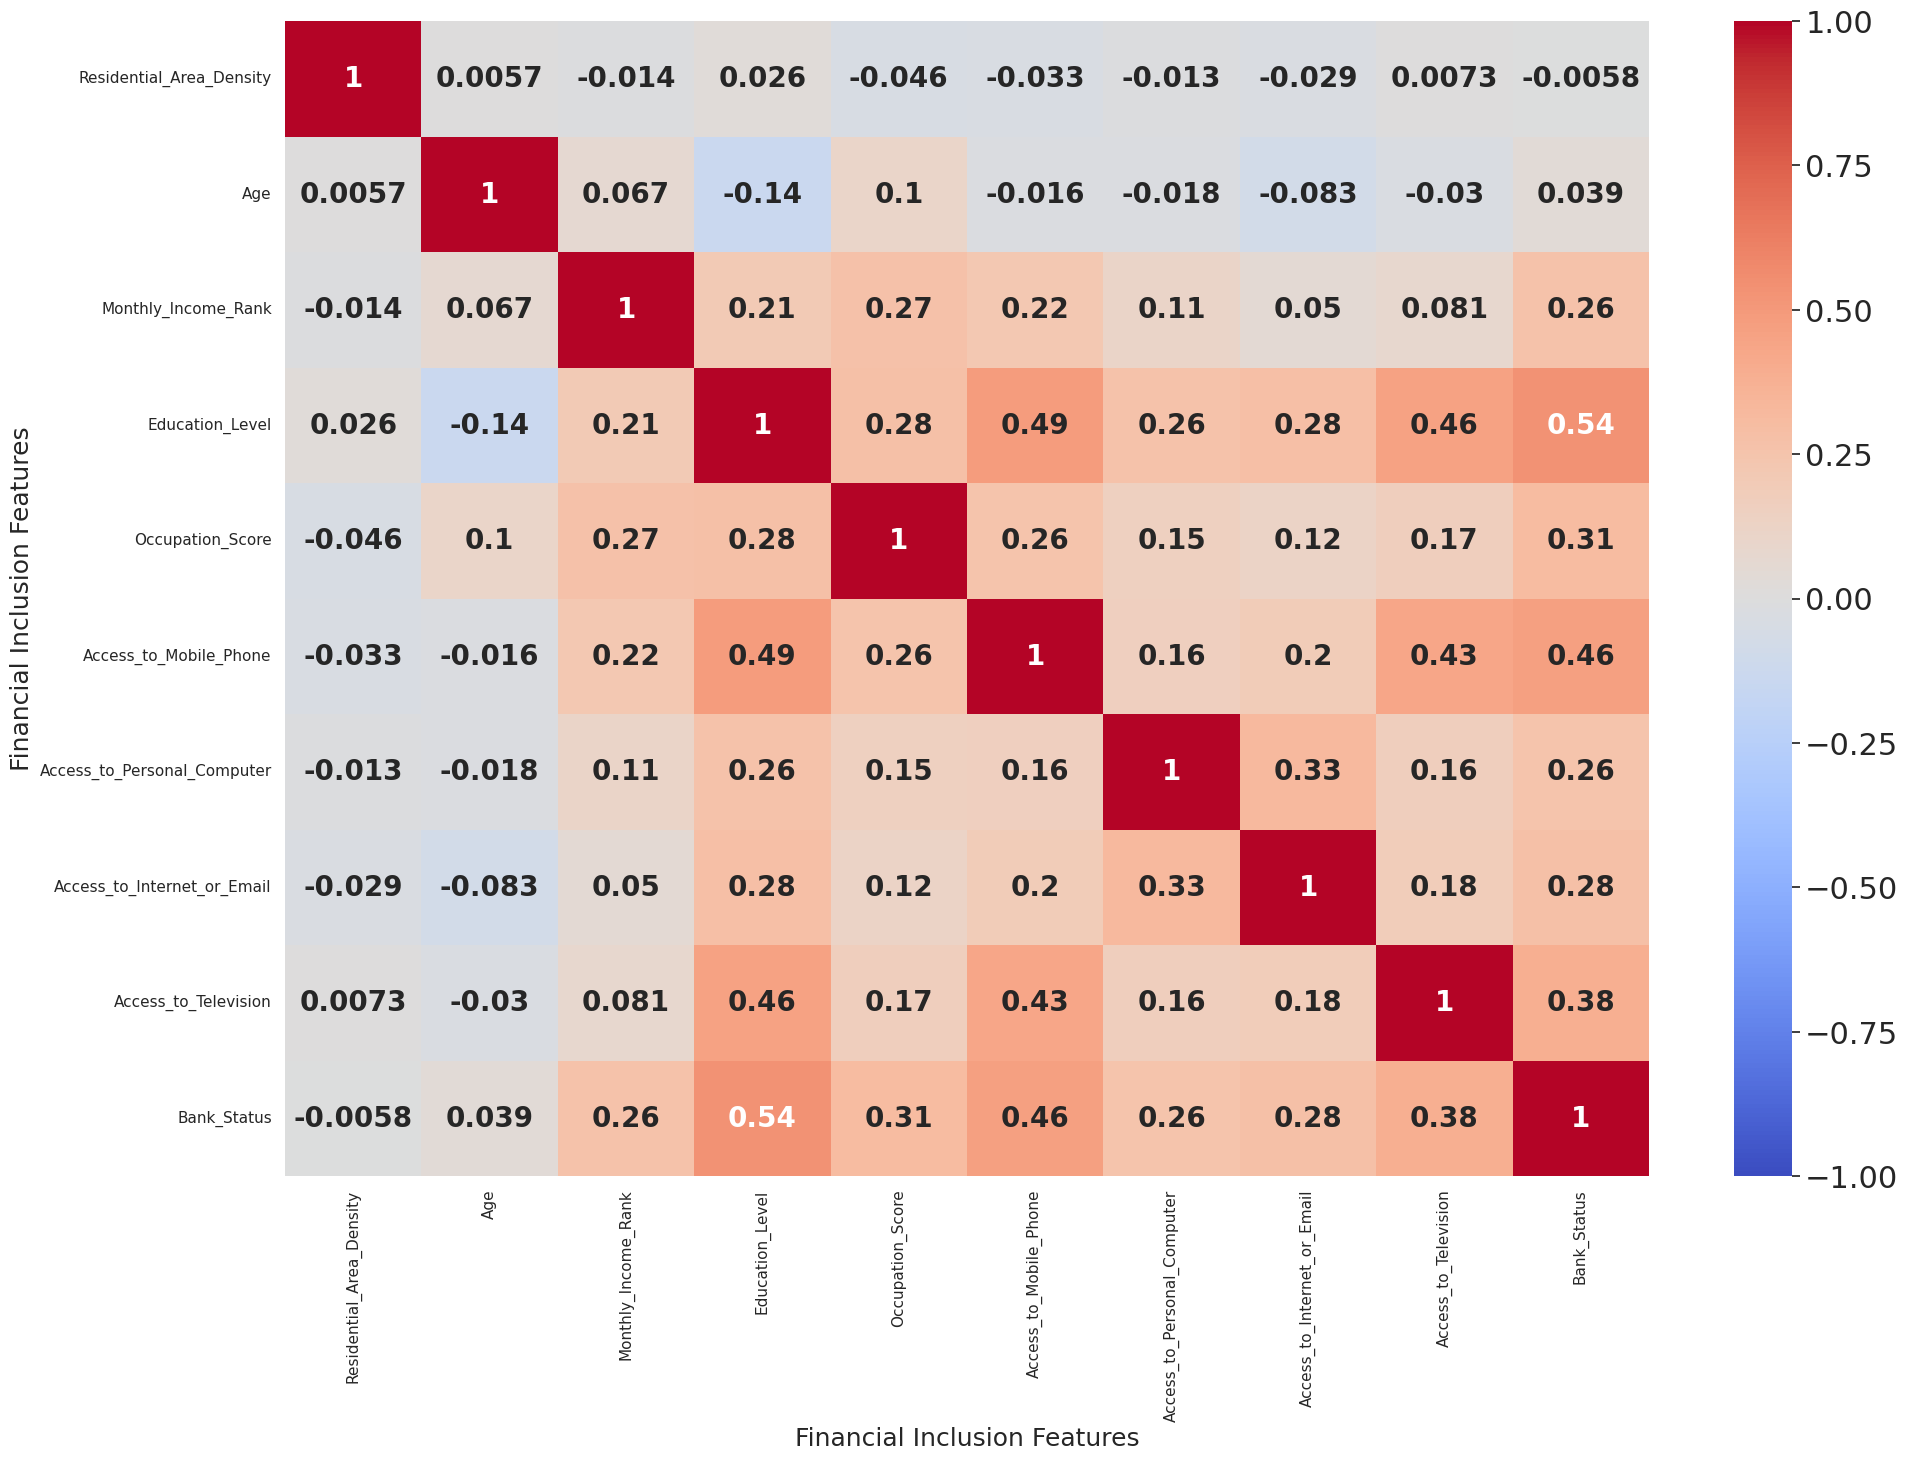

In [ ]:
fig, ax = plt.subplots(figsize=(22,15))
sns.set_theme(style="white", font_scale=2.0)

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"size":20, "fontweight": 'bold'})
#plt.title("Correlation matrix of Numerical Features in dataset", y=-0.25)
plt.xlabel("Financial Inclusion Features", fontsize=18);
plt.ylabel("Financial Inclusion Features", fontsize=18);
plt.show()
fig.savefig('Corrs.jpg', bbox_inches="tight")

<Axes: xlabel='Bank_Status', ylabel='count'>

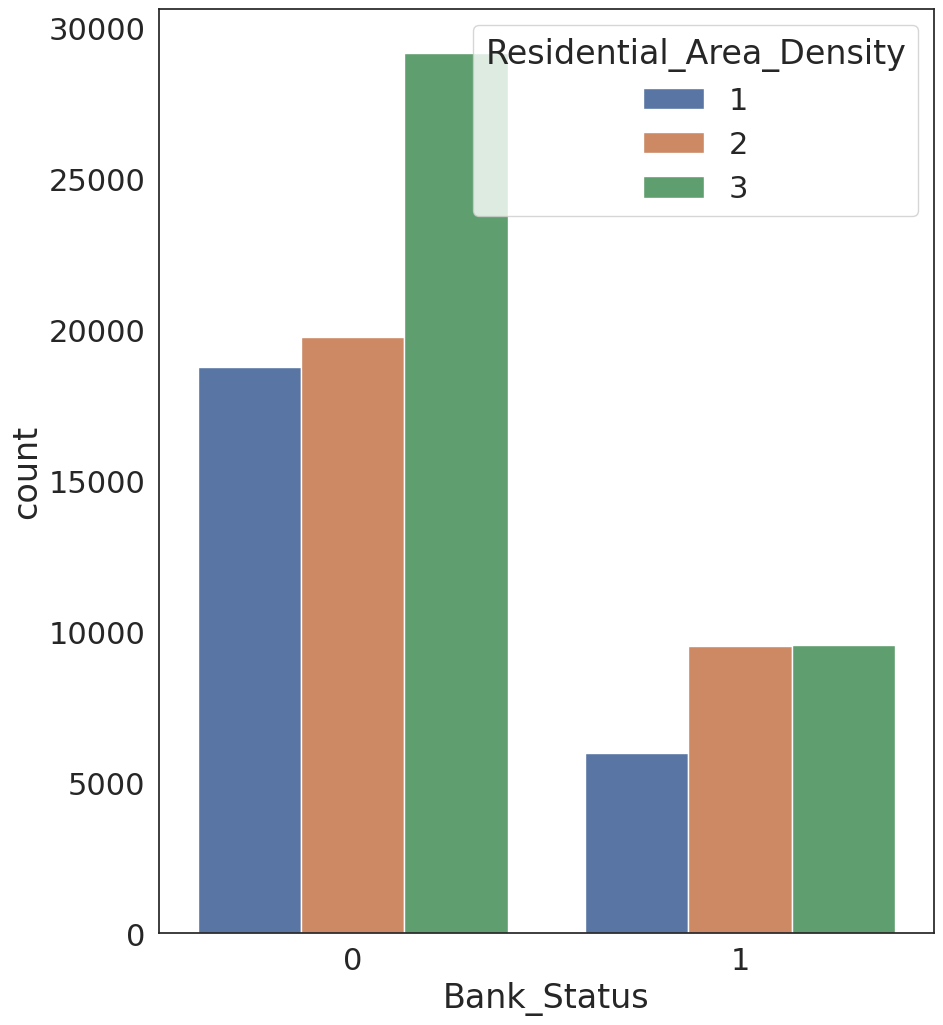

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.countplot(x='Bank_Status', hue='Residential_Area_Density', data=df)

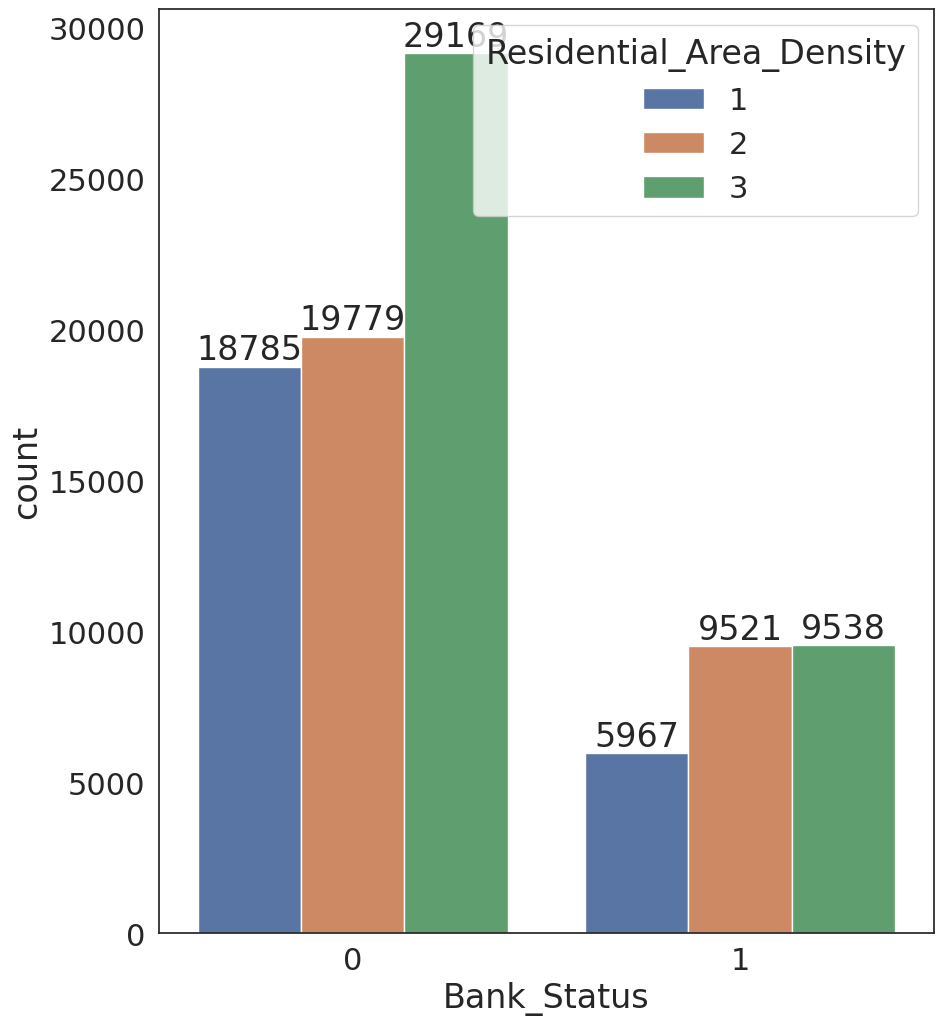

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.countplot(x='Bank_Status', hue='Residential_Area_Density', data=df)
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='Bank_Status', ylabel='count'>

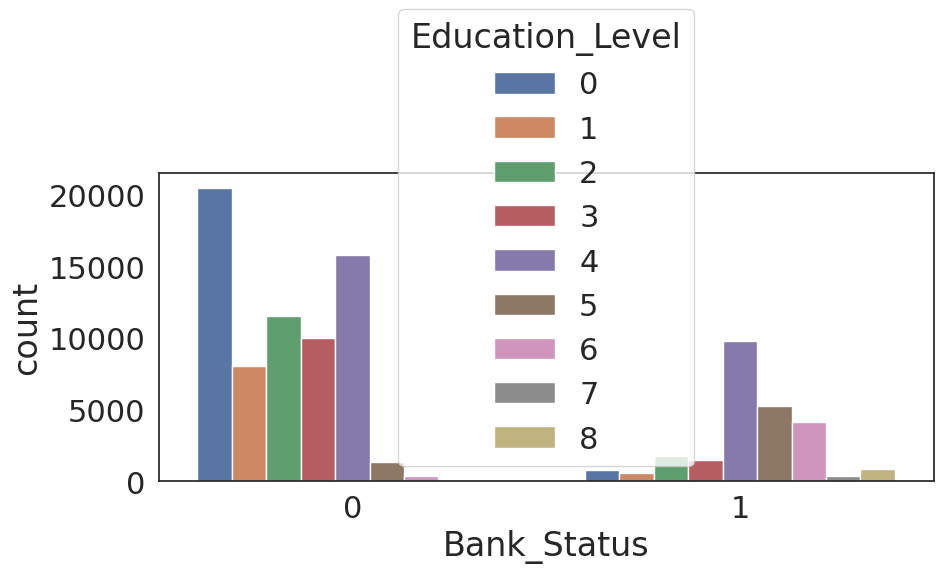

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Bank_Status', hue='Education_Level', data=df)

(array([28004., 20548., 17833., 11257.,  5404.,  5001.,  2597.,  1526.,
          520.,    69.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

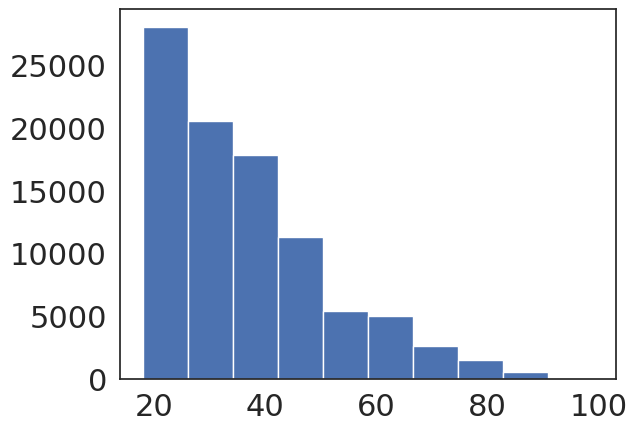

In [ ]:
plt.hist(df['Age'].dropna())

In [ ]:
%matplotlib inline

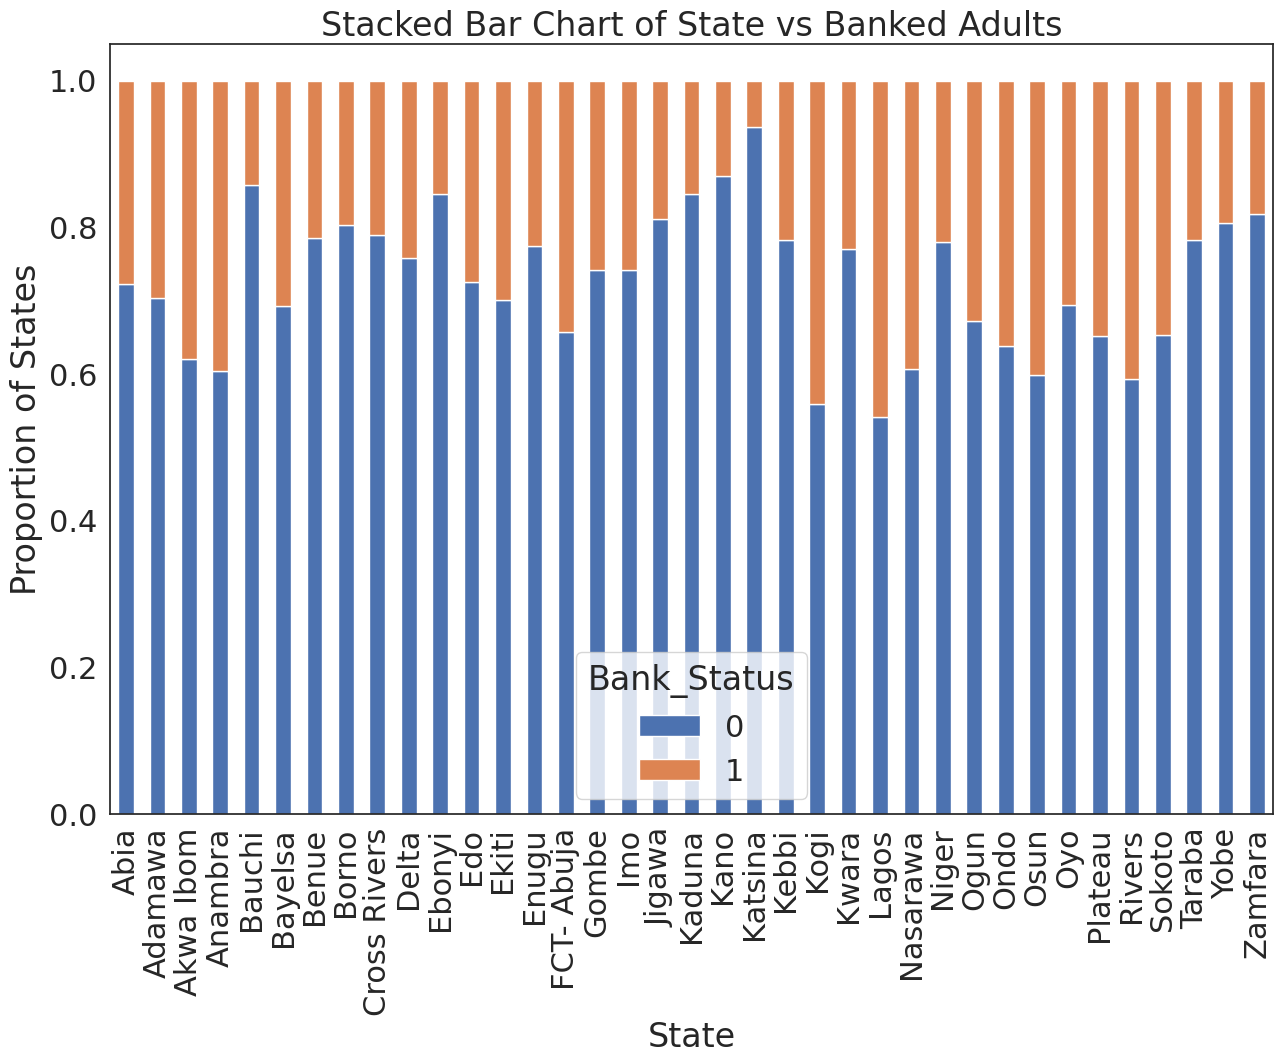

In [ ]:
table=pd.crosstab(df.State , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of State vs Banked Adults')
plt.xlabel('State')
plt.ylabel('Proportion of States')
plt.savefig('Education_Level_vs_banked')

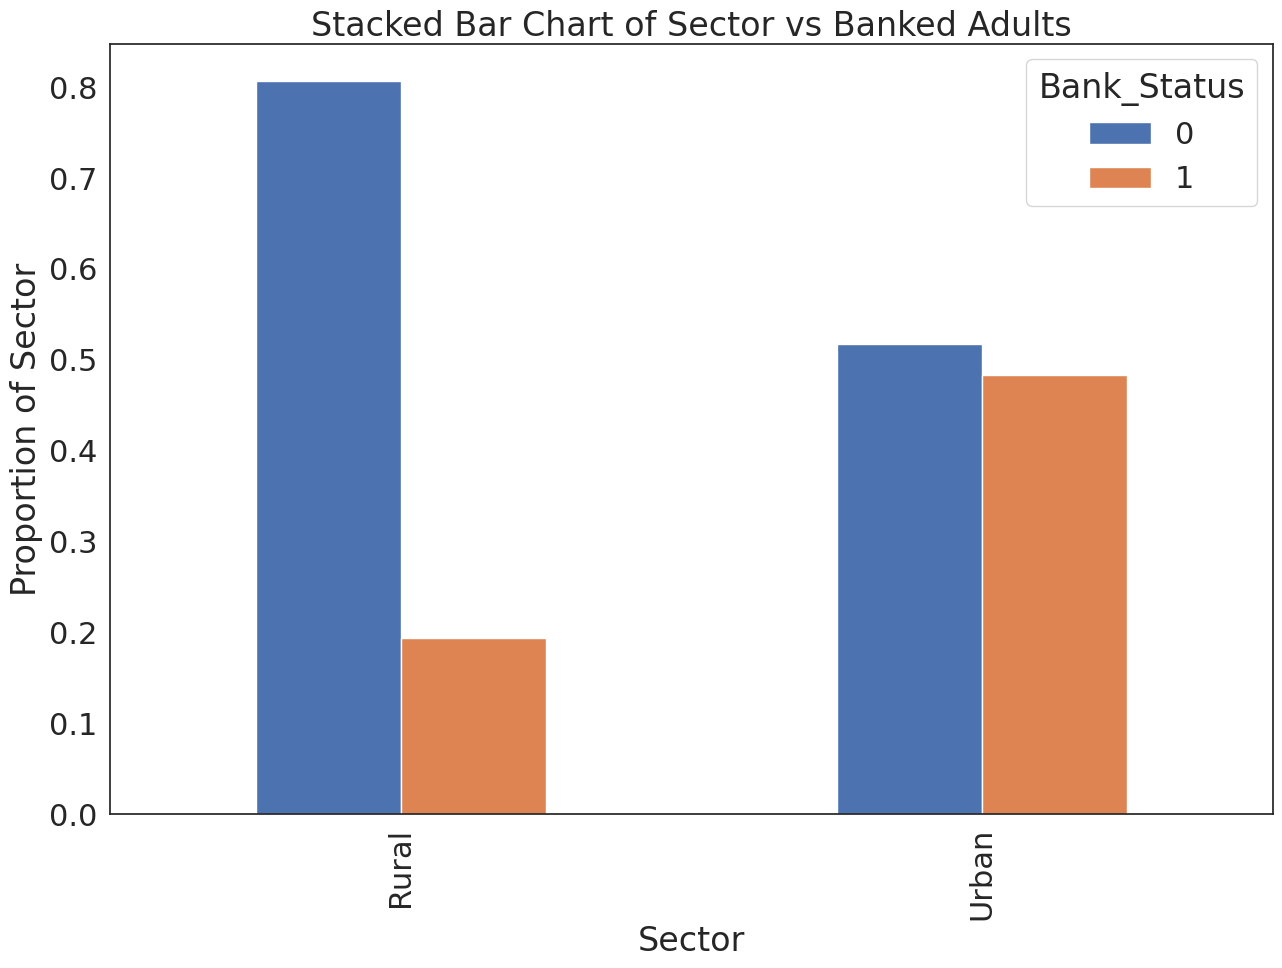

In [ ]:
table=pd.crosstab(df.Sector , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Stacked Bar Chart of Sector vs Banked Adults')
plt.xlabel('Sector')
plt.ylabel('Proportion of Sector')
plt.savefig('Sector_vs_banked')

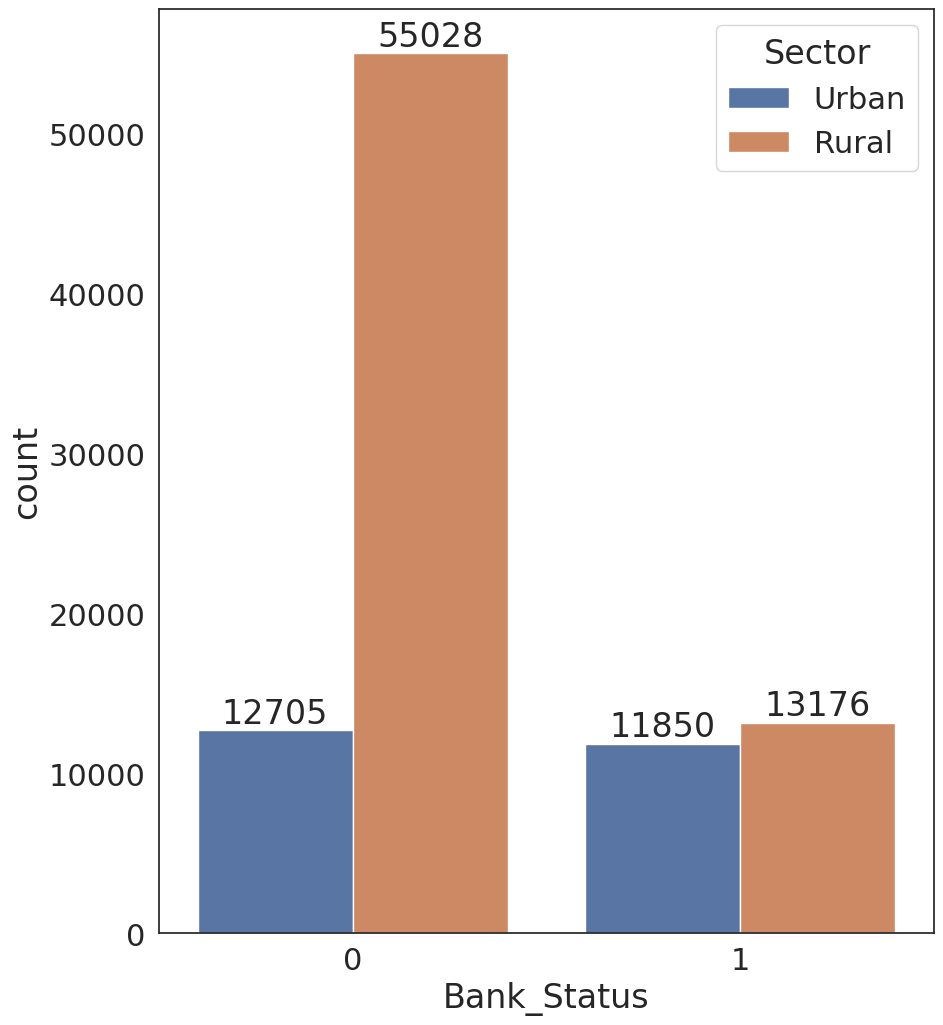

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.countplot(x='Bank_Status', hue='Sector', data=df)
for container in ax.containers:
    ax.bar_label(container)

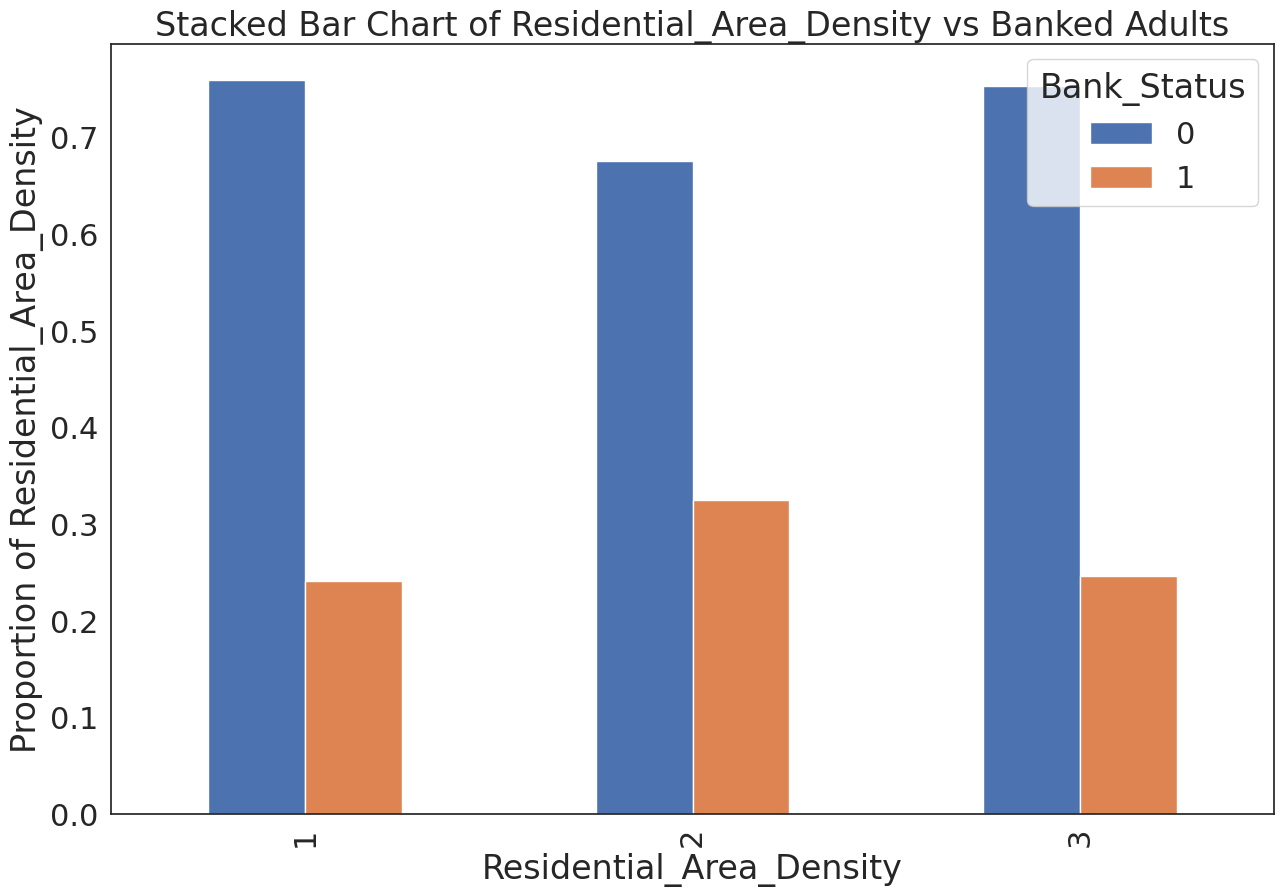

In [ ]:
table=pd.crosstab(df.Residential_Area_Density	 , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Stacked Bar Chart of Residential_Area_Density vs Banked Adults')
plt.xlabel('Residential_Area_Density')
plt.ylabel('Proportion of Residential_Area_Density')
plt.savefig('Residential_Area_Density_vs_banked')

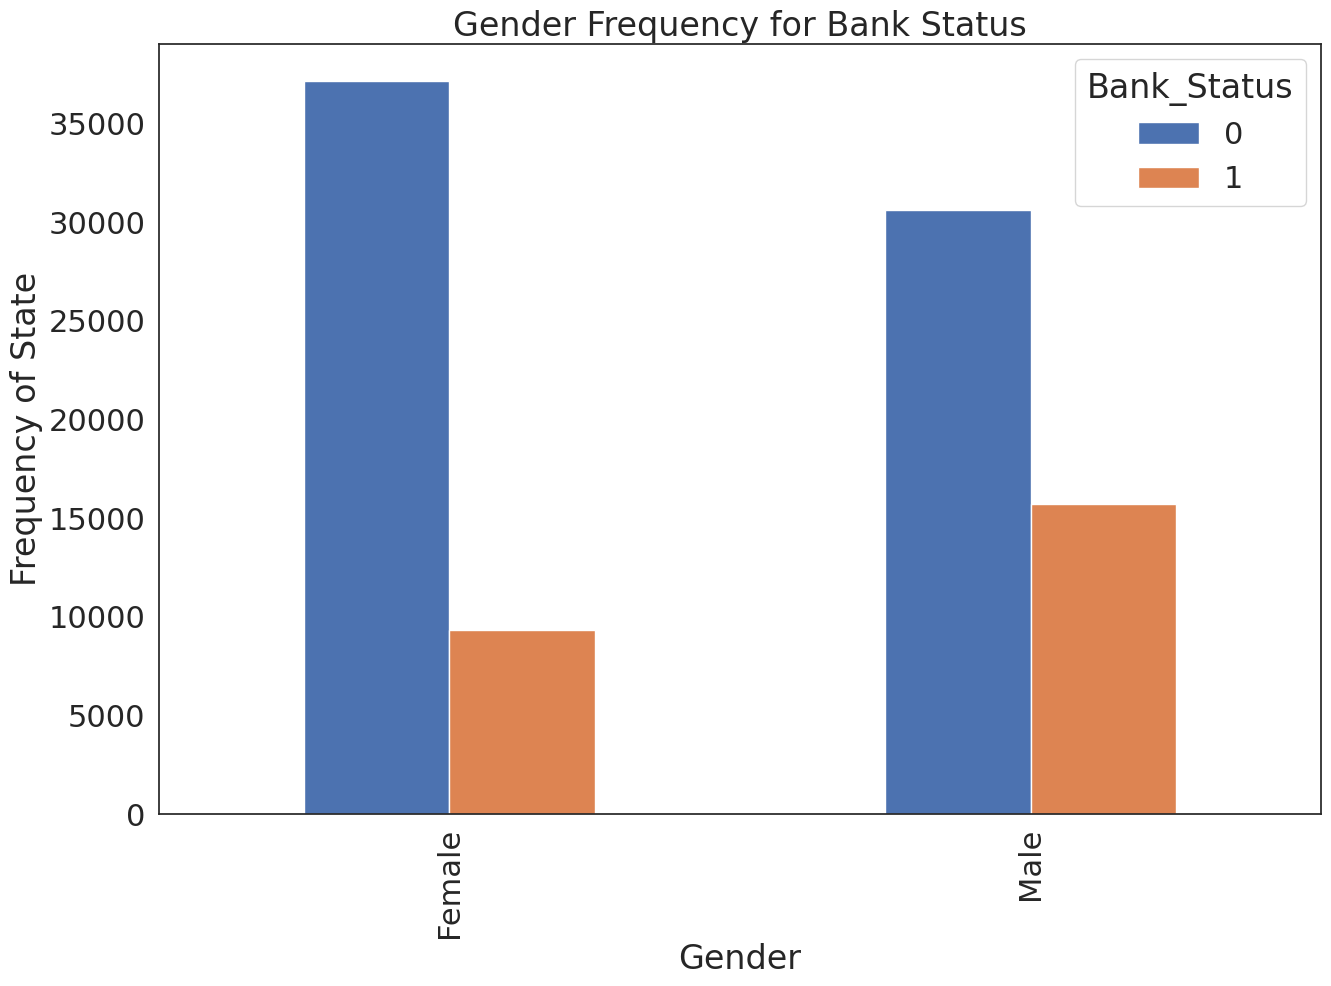

In [ ]:
pd.crosstab(df.Gender,df.Bank_Status).plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Gender Frequency for Bank Status')
plt.xlabel('Gender')
plt.ylabel('Frequency of State')
plt.savefig('Gender_fre_job')

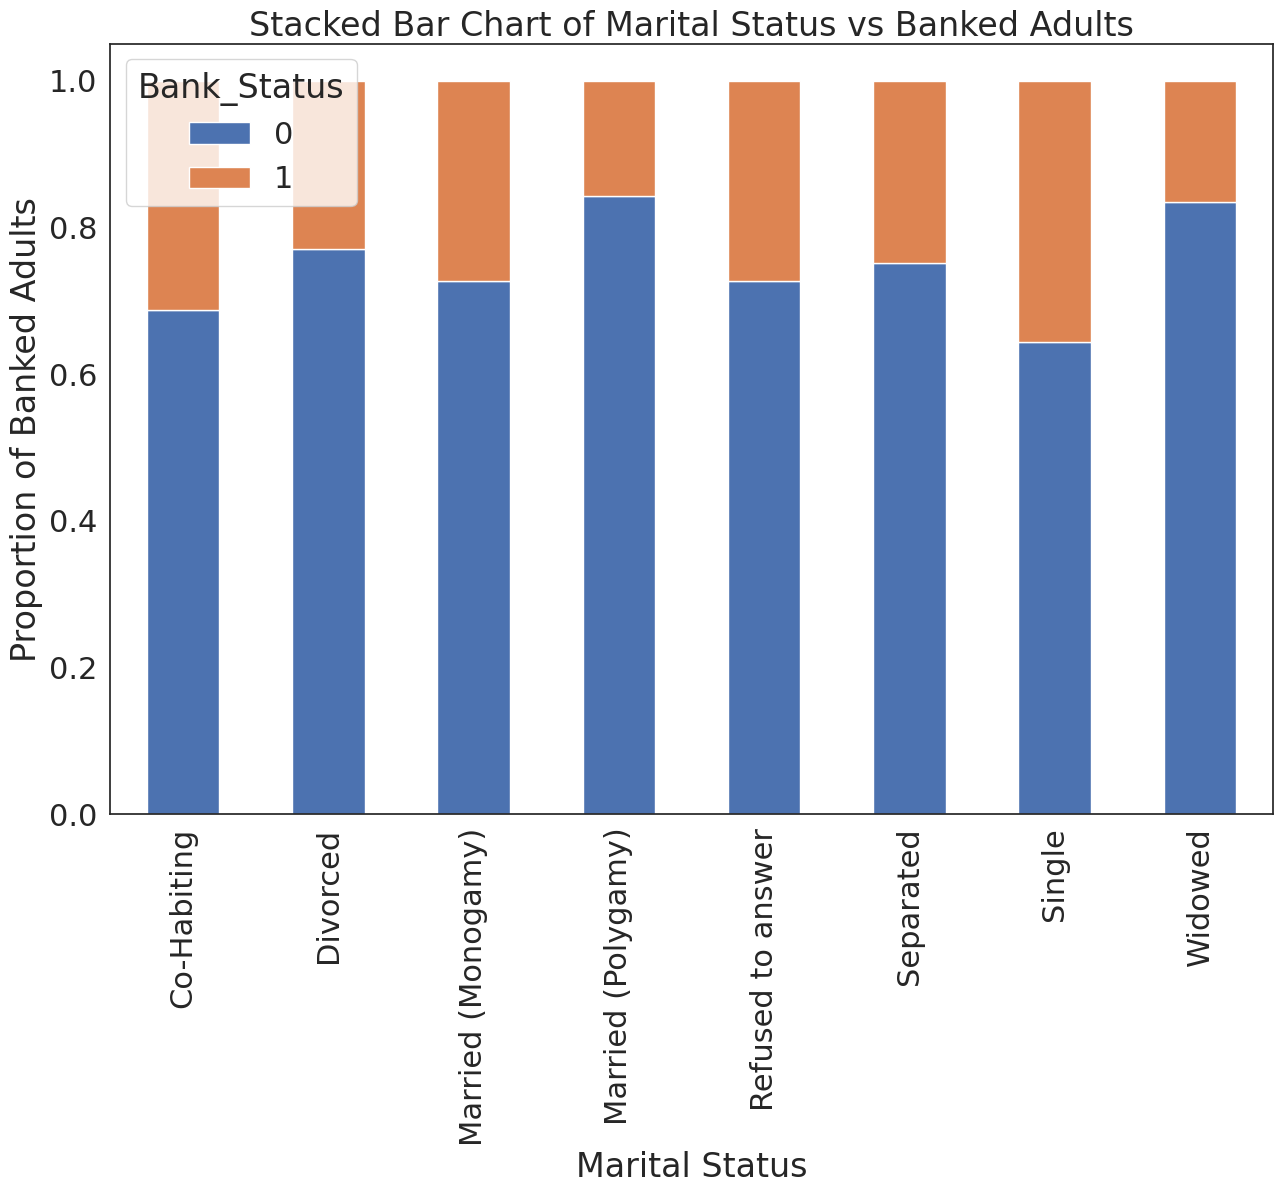

In [ ]:
table=pd.crosstab(df.Marital_status , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of Marital Status vs Banked Adults')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Banked Adults')
plt.savefig('mariral_vs_banked')

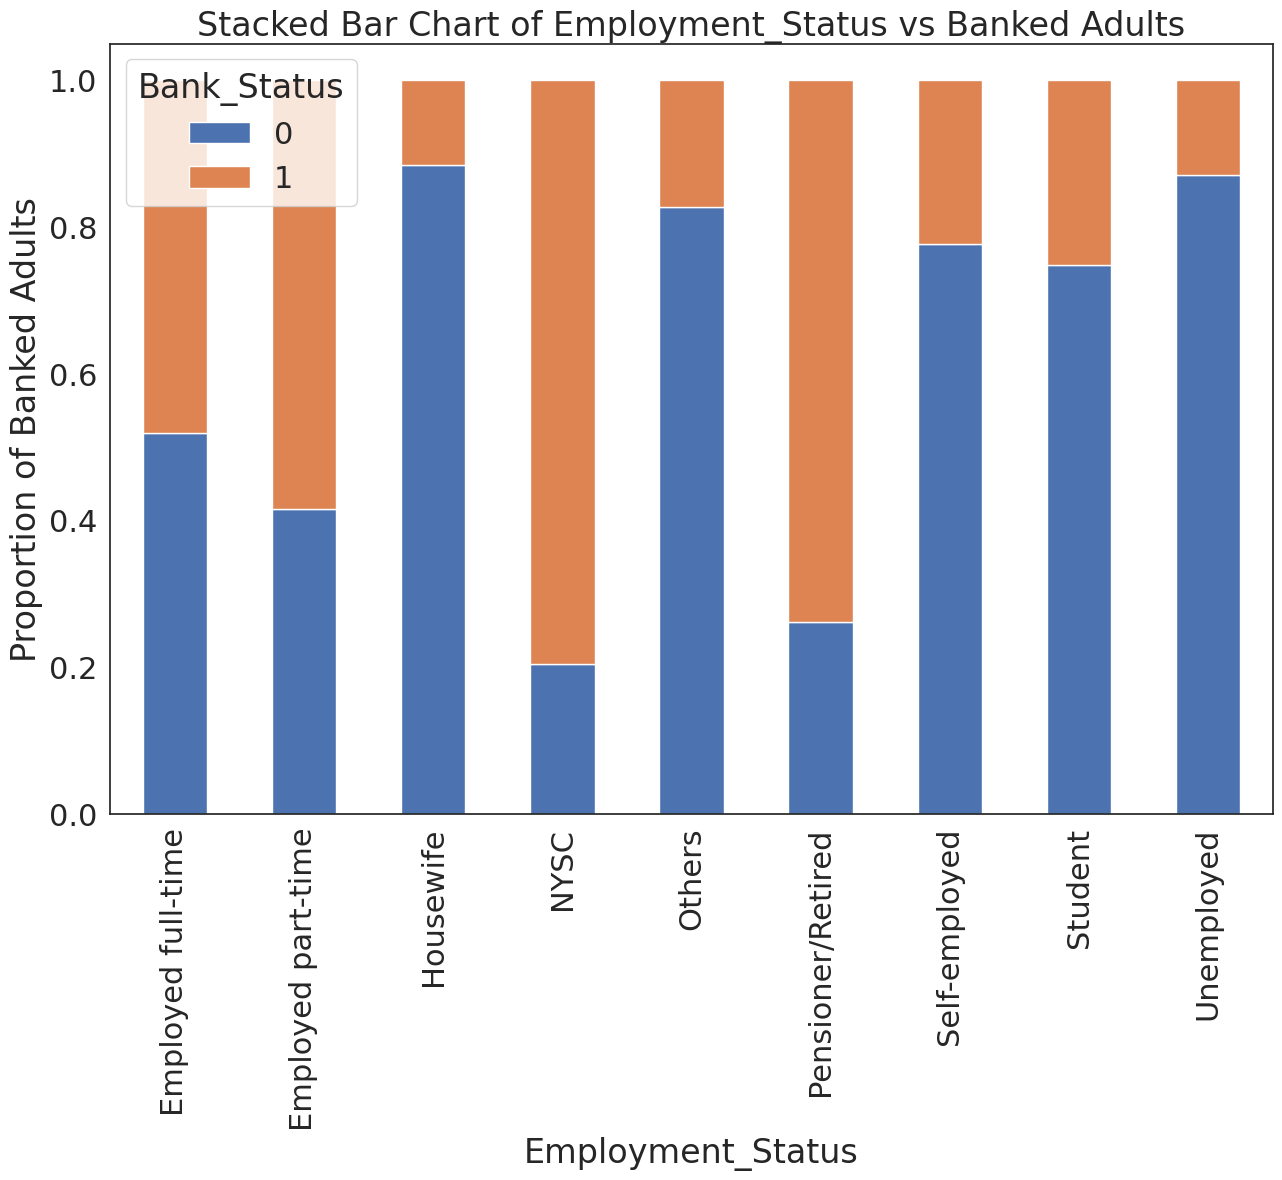

In [ ]:
table=pd.crosstab(df.Employment_Status , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of Employment_Status vs Banked Adults')
plt.xlabel('Employment_Status')
plt.ylabel('Proportion of Banked Adults')
plt.savefig('Employment_Status_vs_banked')

<ipython-input-44-ae880608cf46>:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Monthly_Income_Rank_vs_banked')
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


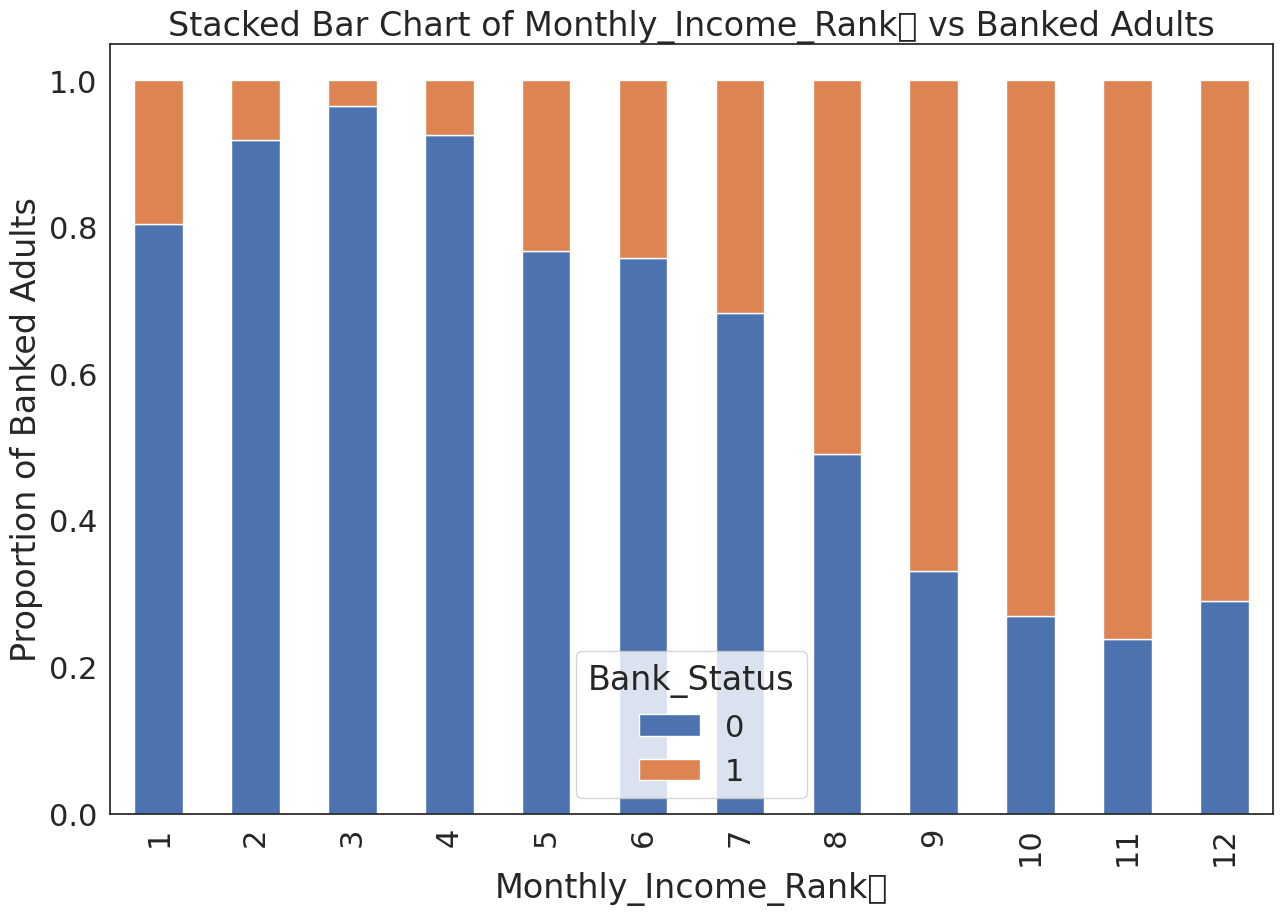

In [ ]:
table=pd.crosstab(df.Monthly_Income_Rank	 , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of Monthly_Income_Rank	 vs Banked Adults')
plt.xlabel('Monthly_Income_Rank	')
plt.ylabel('Proportion of Banked Adults')
plt.savefig('Monthly_Income_Rank_vs_banked')

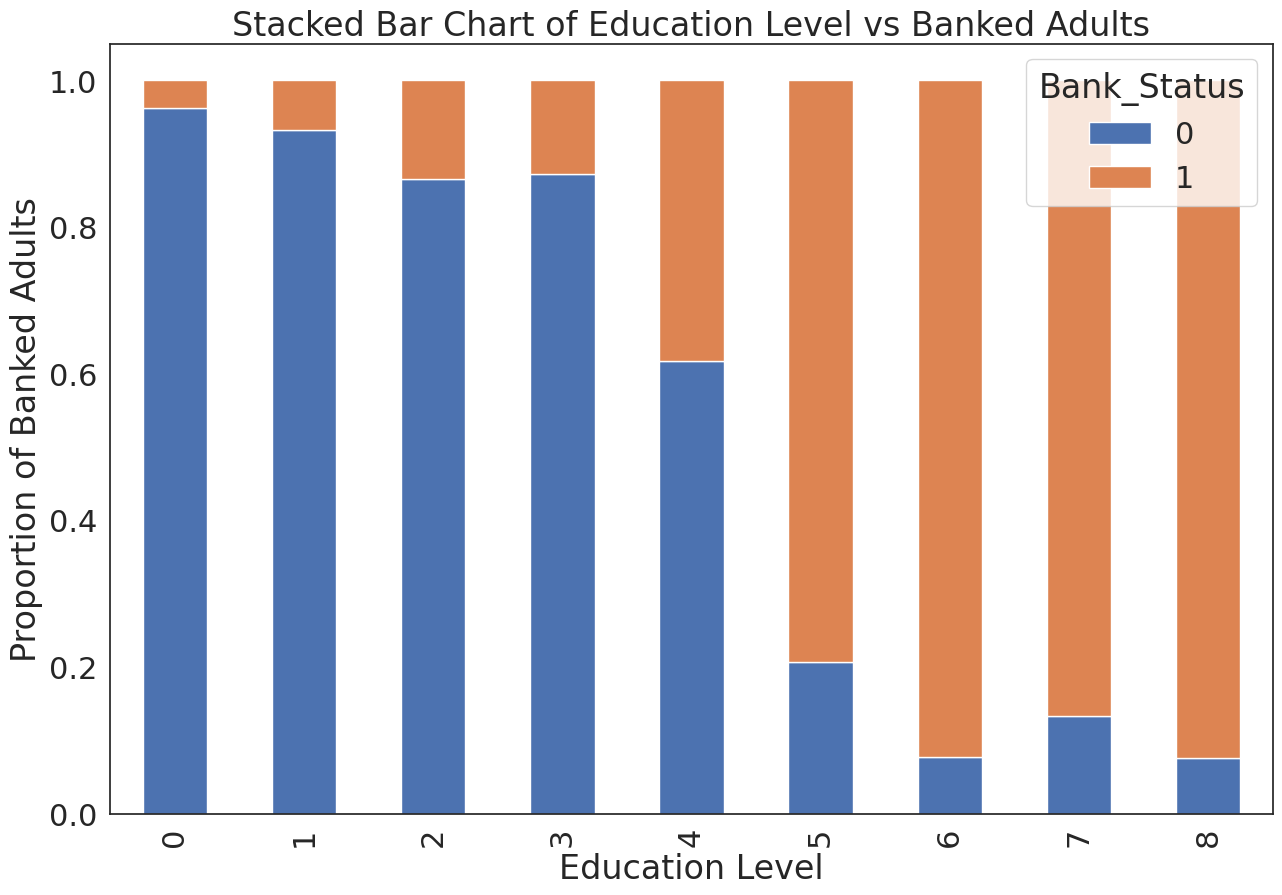

In [ ]:
table=pd.crosstab(df.Education_Level , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of Education Level vs Banked Adults')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Banked Adults')
plt.savefig('Education_Level_vs_banked')

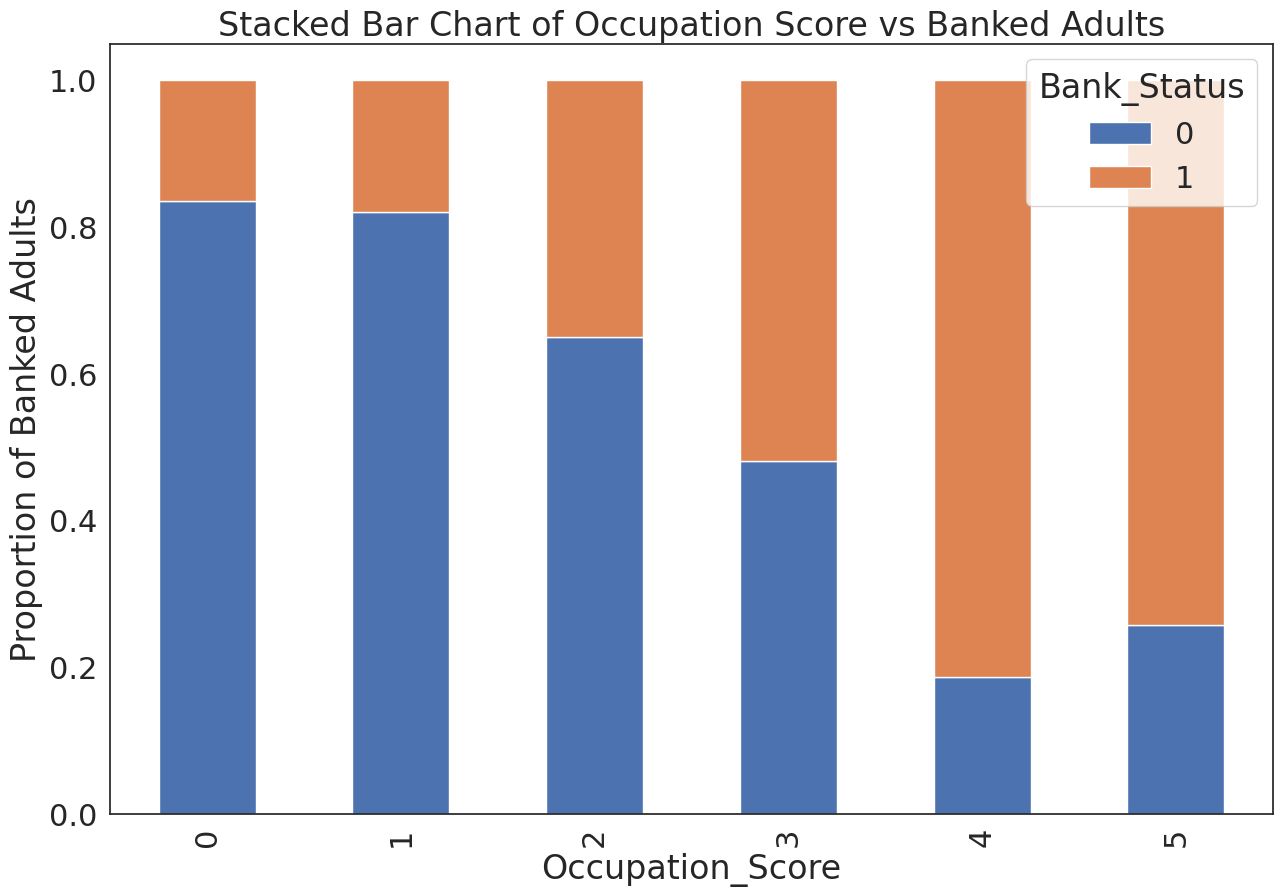

In [ ]:
table=pd.crosstab(df.Occupation_Score , df.Bank_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart of Occupation Score vs Banked Adults')
plt.xlabel('Occupation_Score')
plt.ylabel('Proportion of Banked Adults')
plt.savefig('Occupation_Score_vs_banked')

<ipython-input-47-f73d06dd109e>:5: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Access_to_Mobile_Phone	_fre_job')
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


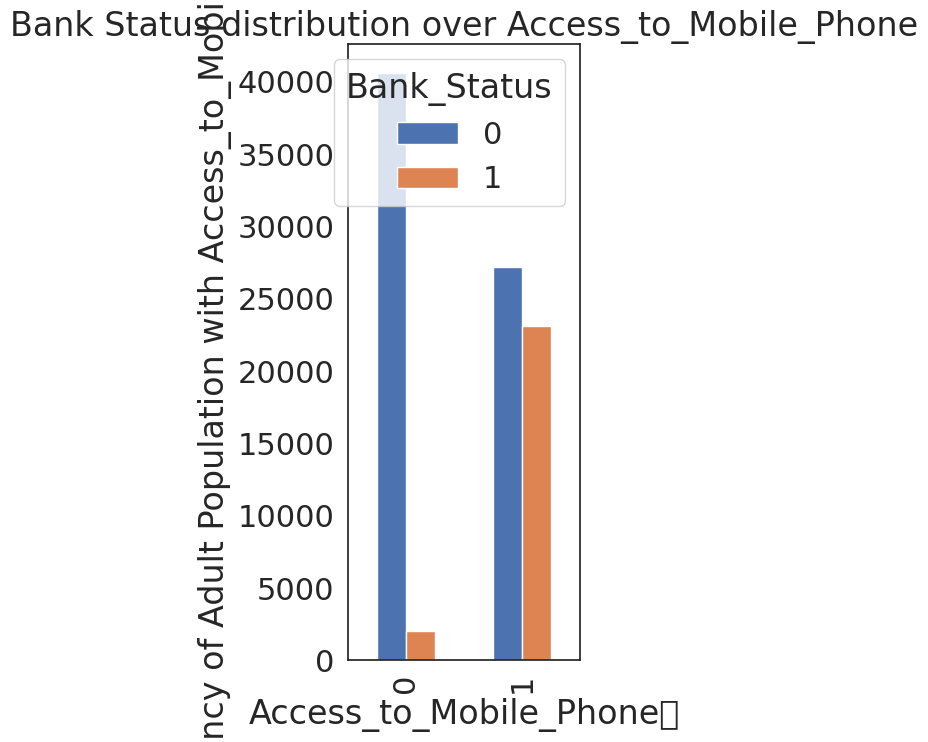

In [ ]:
pd.crosstab(df.Access_to_Mobile_Phone	,df.Bank_Status).plot(kind='bar', stacked=False, figsize=(3, 8))
plt.title('Bank Status distribution over Access_to_Mobile_Phone')
plt.xlabel('Access_to_Mobile_Phone	')
plt.ylabel('Frequency of Adult Population with Access_to_Mobile_Phone')
plt.savefig('Access_to_Mobile_Phone	_fre_job')

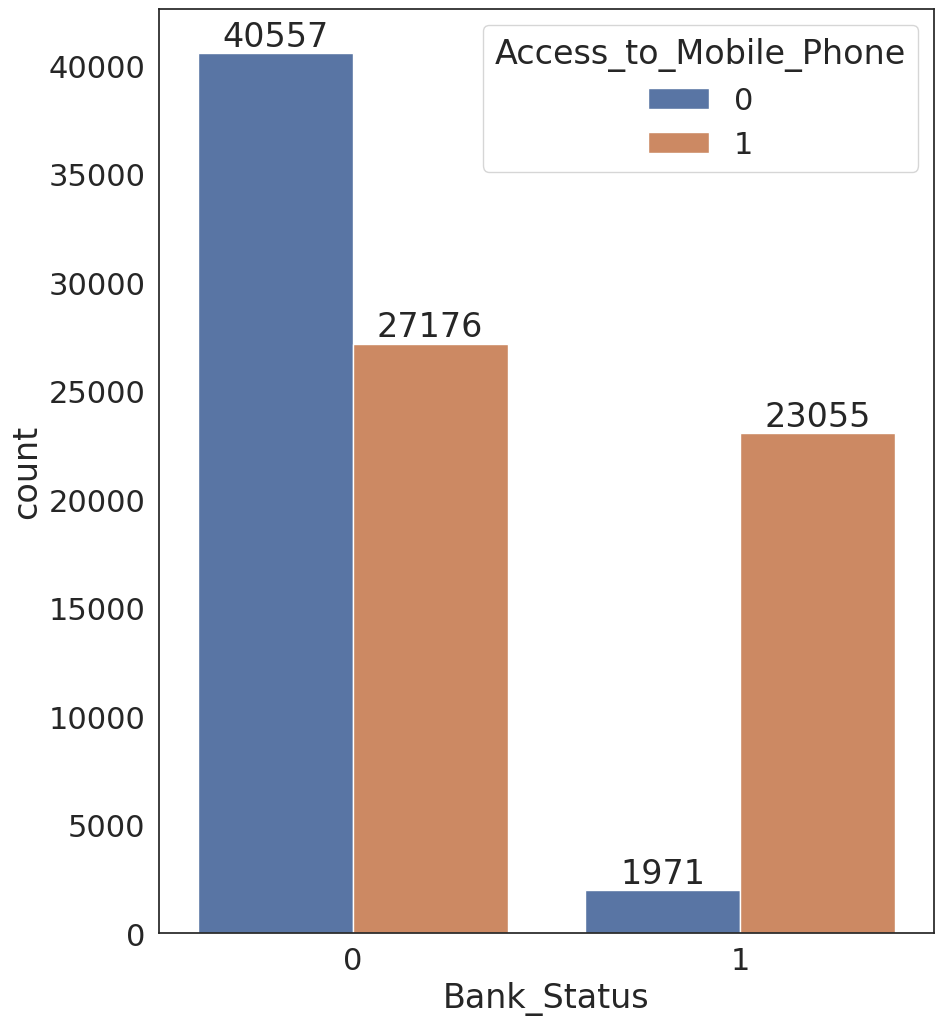

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
sns.countplot(x='Bank_Status', hue='Access_to_Mobile_Phone', data=df)
for container in ax.containers:
    ax.bar_label(container)

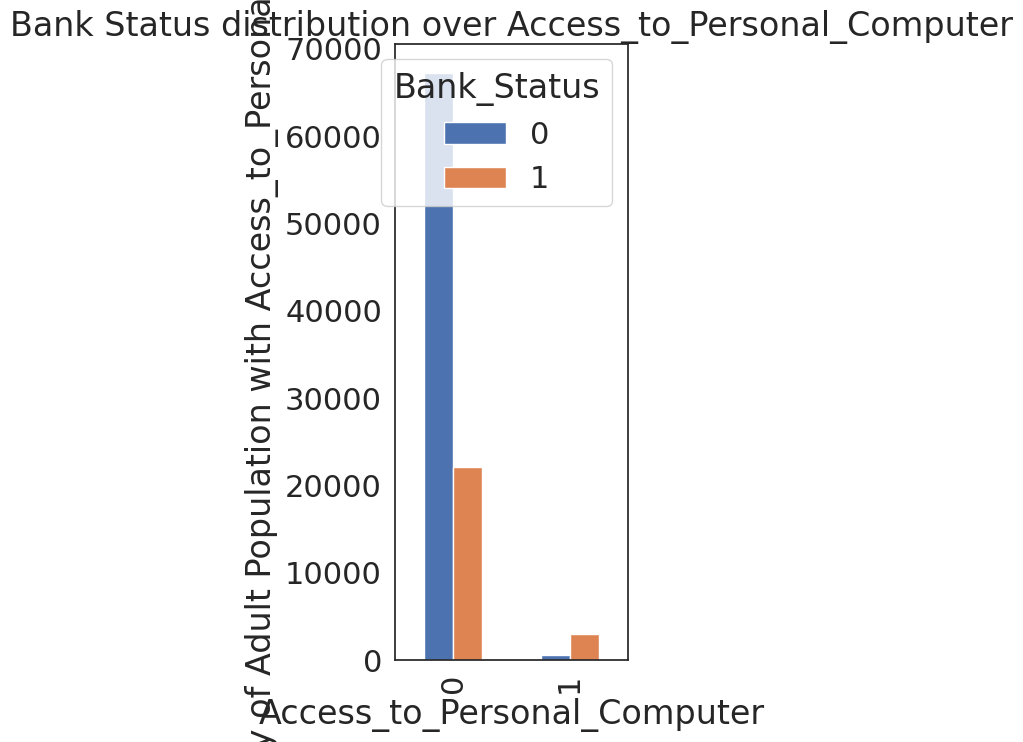

In [ ]:
pd.crosstab(df.Access_to_Personal_Computer	,df.Bank_Status).plot(kind='bar', stacked=False, figsize=(3, 8))
plt.title('Bank Status distribution over Access_to_Personal_Computer')
plt.xlabel('Access_to_Personal_Computer')
plt.ylabel('Frequency of Adult Population with Access_to_Personal_Computer')
plt.savefig('Access_to_Personal_Computer_Phone_fre_job')

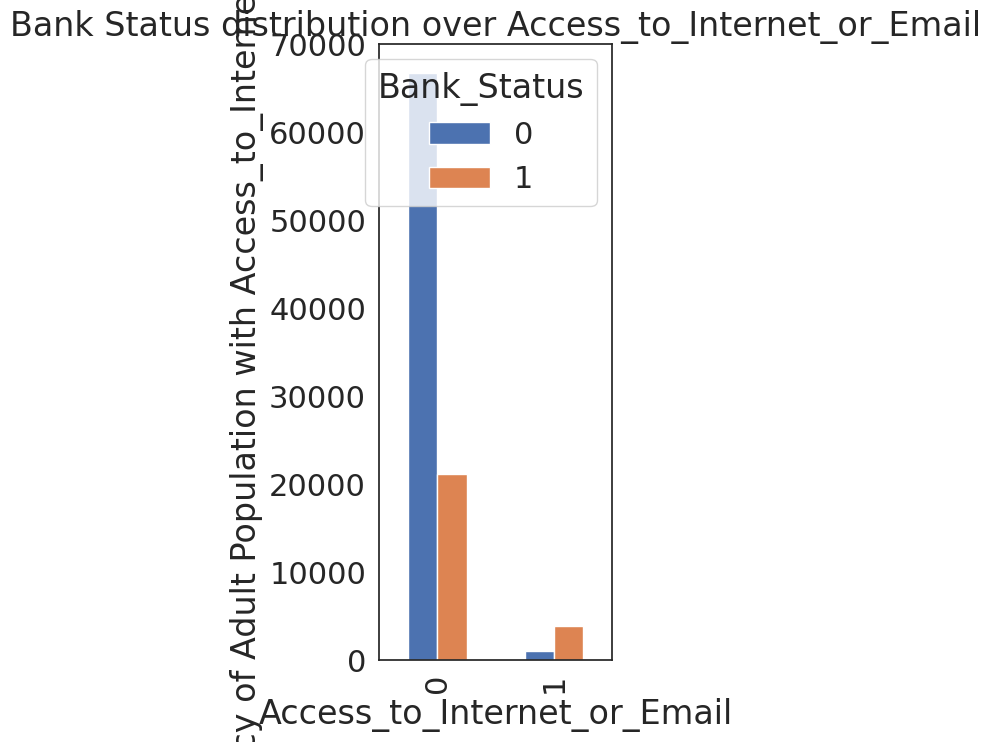

In [ ]:
pd.crosstab(df.Access_to_Internet_or_Email, df.Bank_Status).plot(kind='bar', stacked=False, figsize=(3, 8))
plt.title('Bank Status distribution over Access_to_Internet_or_Email')
plt.xlabel('Access_to_Internet_or_Email')
plt.ylabel('Frequency of Adult Population with Access_to_Internet_or_Email')
plt.savefig('Access_to_Internet_or_Email_fre_job')

<ipython-input-51-52b9c8654461>:5: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Access_to_Television_fre_job')
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


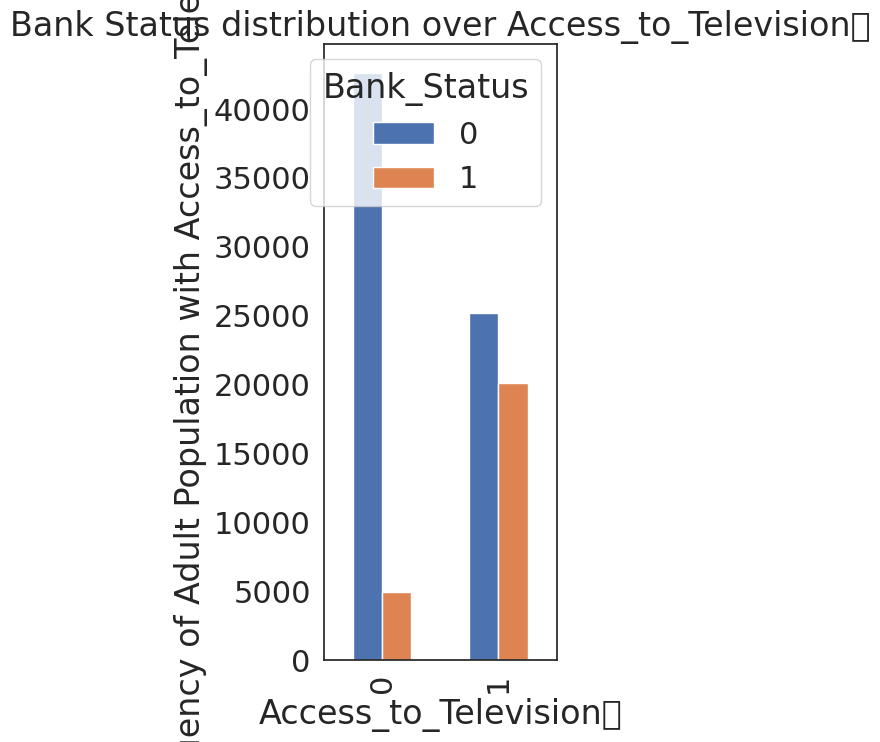

In [ ]:
pd.crosstab(df.Access_to_Television	, df.Bank_Status).plot(kind='bar', stacked=False, figsize=(3, 8))
plt.title('Bank Status distribution over Access_to_Television	')
plt.xlabel('Access_to_Television	')
plt.ylabel('Frequency of Adult Population with Access_to_Television	')
plt.savefig('Access_to_Television_fre_job')

In [ ]:
#df.head()

# Building the Baseline Classification Model using Logistic Regression

In [ ]:
# Create Dummy Variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.loc[:, df_encoded.columns != 'Bank_Status']
y = df_encoded.loc[:, df_encoded.columns == 'Bank_Status']
X.head()

,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,State_Adamawa,...,Marital_status_Single,Marital_status_Widowed,Employment_Status_Employed part-time,Employment_Status_Housewife,Employment_Status_NYSC,Employment_Status_Others,Employment_Status_Pensioner/Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed
0,2,36,5,6,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,85,6,1,2,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,45,6,3,4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,55,9,4,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,3,40,5,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# split X and y into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(len(y_test))
print(len(y_pred))

Accuracy of logistic regression classifier on test set: 0.85
23190
23190


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[15675  1277]
 [ 2133  4105]]


In [ ]:
print(X_train.shape)
print(X_test.shape)

(69569, 62)
(23190, 62)


*** Model Evaluation ***

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     16952
           1       0.76      0.66      0.71      6238

    accuracy                           0.85     23190
   macro avg       0.82      0.79      0.80     23190
weighted avg       0.85      0.85      0.85     23190



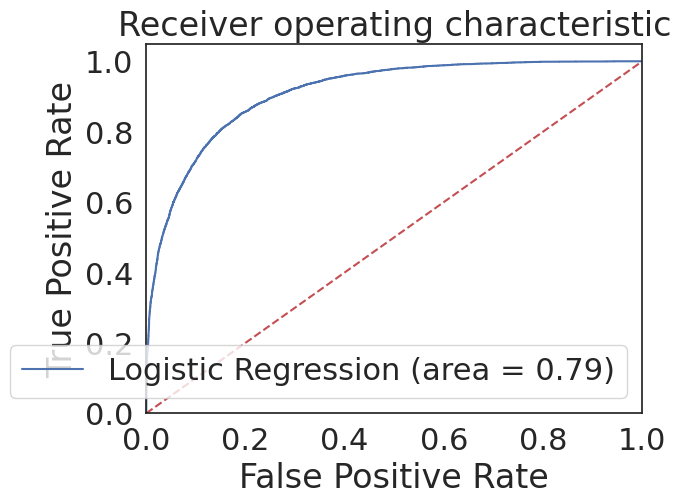

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

,Predicted as Unbanked:0,Predicted as Banked:1
Actually Unbanked:0,15675,1277
Actually Banked:1,2133,4105


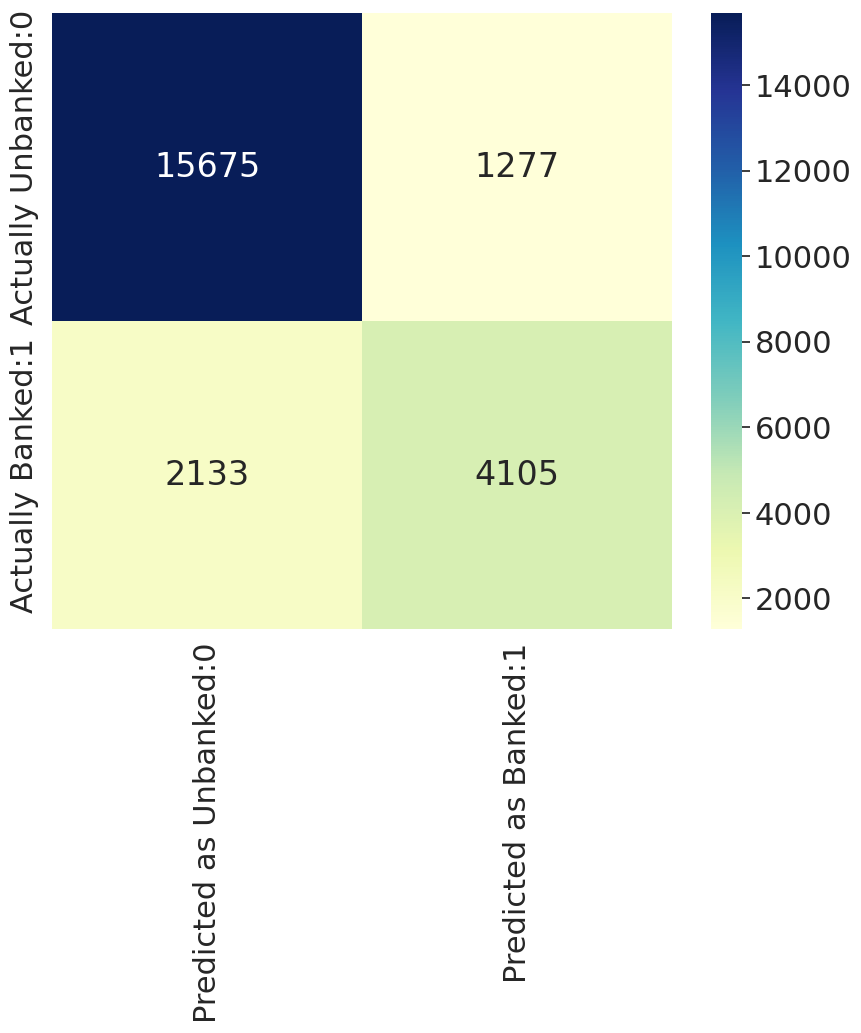

In [ ]:
# confusion Matrix
conf_matrix=pd.DataFrame(data=confusion_matrix,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
conf_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
def perf_measure(actual, prediction):
  TN, FP, FN, TP = confusion_matrix(actual, prediction).ravel()

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = round(TP/(TP+FN),3)
  print('Sensitivity, Recall, or True Positive Rate - TPR: {:.2f}'.format(TPR))

  # Specificity or true negative rate
  TNR = round(TN/(TN+FP),3)
  print('Specificity or True Negative Rate - TNR:          {:.2f}'.format(TNR))

  # Precision or positive predictive value
  PPV = round(TP/(TP+FP),3)
  print('Precision or Positive Predictive Value - PPV:     {:.2f}'.format(PPV))

  # Negative predictive value
  NPV = round(TN/(TN+FN),3)
  print('Negative Predictive Value - NPV:                  {:.2f}'.format(NPV))

  # Fall out or false positive rate
  FPR = round(FP/(FP+TN),3)
  print('Fall Out or False Positive Rate - FPR:            {:.2f}'.format(FPR))

  # False negative rate
  FNR = round(FN/(TP+FN),3)
  print('False Negative Rate - FNR:                        {:.2f}'.format(FNR))

  # False discovery rate
  FDR = round(FP/(TP+FP),3)
  print('False Discovery Rate - FDR:                       {:.2f}'.format(FDR))

  # Overall accuracy
  ACC = round((TP+TN)/(TP+FP+FN+TN),3)
  print('Overall Accuracy - ACC:                           {:.2f}'.format(ACC))

  return (TPR, TNR, PPV, NPV, FPR, FDR, ACC)

In [ ]:
print('Test - Logistic Regression Model Measure')
perf_measure(y_test, y_pred)

Test - Logistic Regression Model Measure
Sensitivity, Recall, or True Positive Rate - TPR: 0.66
Specificity or True Negative Rate - TNR:          0.93
Precision or Positive Predictive Value - PPV:     0.76
Negative Predictive Value - NPV:                  0.88
Fall Out or False Positive Rate - FPR:            0.07
False Negative Rate - FNR:                        0.34
False Discovery Rate - FDR:                       0.24
Overall Accuracy - ACC:                           0.85


(0.658, 0.925, 0.763, 0.88, 0.075, 0.237, 0.853)

In [ ]:
#count_df_encoded_unbanked, count_df_encoded_banked

#Balancing the Dataset - Undersampling

<Axes: xlabel='Bank_Status', ylabel='count'>

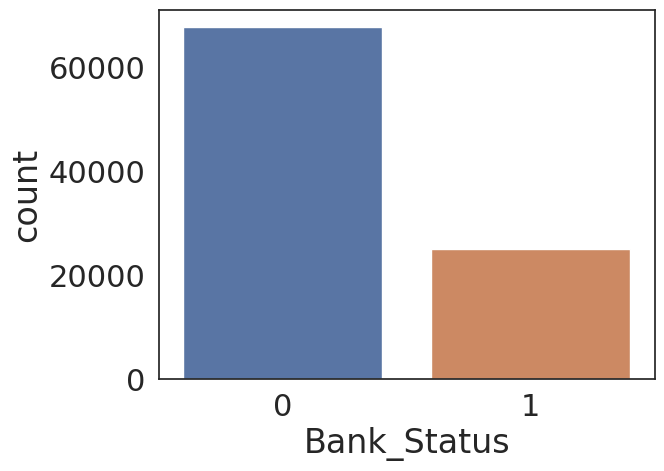

In [ ]:
## Get the Banked and the Unbanked dataset
df_encoded_banked = df_encoded[df_encoded['Bank_Status']==1]
df_encoded_unbanked = df_encoded[df_encoded['Bank_Status']==0]

sns.countplot(x='Bank_Status', data=df_encoded)

In [ ]:
print(df_encoded_banked.shape,df_encoded_unbanked.shape)

(25026, 63) (67733, 63)


*** Random Undersampling ***

In [ ]:
reload_dataset()

Random under-sampling:
0    25026
1    25026
Name: Bank_Status, dtype: int64


,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status,...,Marital_status_Single,Marital_status_Widowed,Employment_Status_Employed part-time,Employment_Status_Housewife,Employment_Status_NYSC,Employment_Status_Others,Employment_Status_Pensioner/Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed
67838,3,22,6,4,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
30554,3,25,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
89530,3,55,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20039,2,35,8,2,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
40708,3,23,4,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92754,3,25,7,6,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
92755,1,46,8,2,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92756,3,60,8,5,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92757,1,58,8,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model 1: Logistic Regression ###

In [ ]:
# making a Logistic Regression on the Undersampled Data
df_encoded_under = reload_dataset()

X = df_encoded_under.loc[:, df_encoded_under.columns != 'Bank_Status']
y = df_encoded_under.loc[:, df_encoded_under.columns == 'Bank_Status']

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_encoded_under_train, X_encoded_under_test, y_encoded_under_train, y_encoded_under_test = train_test_split(X, y, test_size=0.25, random_state=0)

logreg2 = LogisticRegression()
logreg2.fit(X_encoded_under_train, y_encoded_under_train)

Random under-sampling:
0    25026
1    25026
Name: Bank_Status, dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_encoded_under_test, y_encoded_under_test)))
y_encoded_under_pred = logreg.predict(X_encoded_under_test)

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
#logreg.summary()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_encoded_under_test, y_encoded_under_pred)
print(confusion_matrix2)

[[5801  485]
 [2085 4142]]


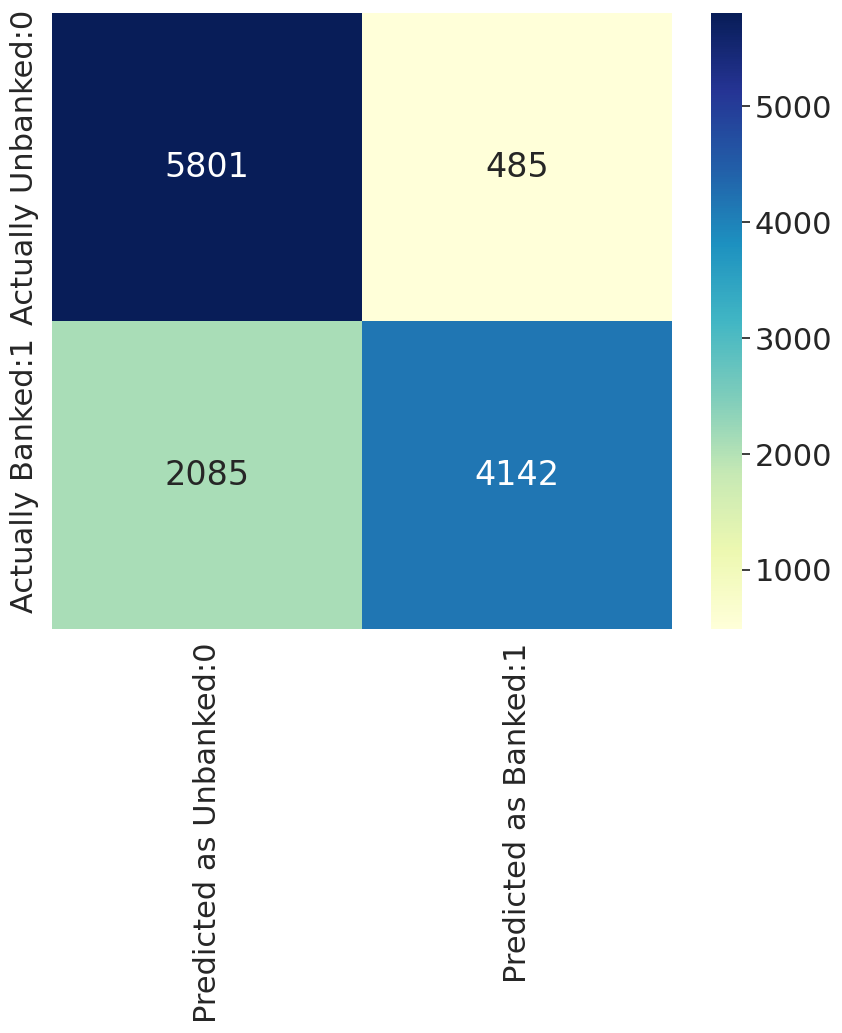

In [ ]:
conf_matrix=pd.DataFrame(data=confusion_matrix2,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(classification_report(y_encoded_under_test, y_encoded_under_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      6286
           1       0.90      0.67      0.76      6227

    accuracy                           0.79     12513
   macro avg       0.82      0.79      0.79     12513
weighted avg       0.82      0.79      0.79     12513



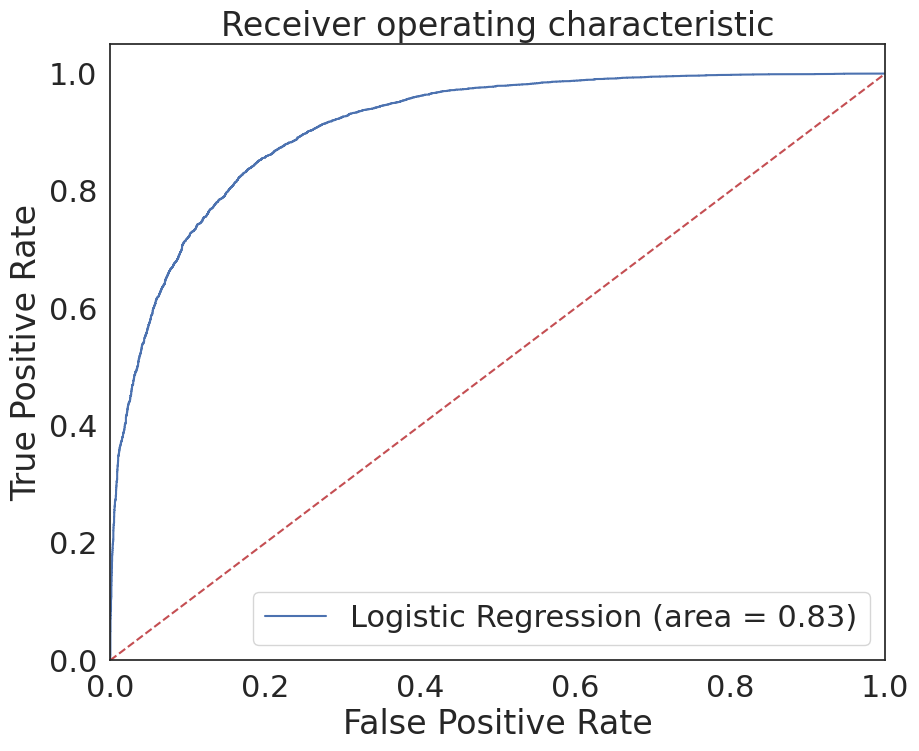

In [ ]:
logit_roc_auc = roc_auc_score(y_encoded_under_test, logreg2.predict(X_encoded_under_test))
fpr, tpr, thresholds = roc_curve(y_encoded_under_test, logreg.predict_proba(X_encoded_under_test)[:,1])
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('Model #1 - Logistic Regression Model Measure - Using Undersampled Data:')
perf_measure(y_encoded_under_test, logreg2.predict(X_encoded_under_test))

Model #1 - Logistic Regression Model Measure - Using Undersampled Data:
Sensitivity, Recall, or True Positive Rate - TPR: 0.85
Specificity or True Negative Rate - TNR:          0.81
Precision or Positive Predictive Value - PPV:     0.81
Negative Predictive Value - NPV:                  0.85
Fall Out or False Positive Rate - FPR:            0.20
False Negative Rate - FNR:                        0.15
False Discovery Rate - FDR:                       0.19
Overall Accuracy - ACC:                           0.83


(0.852, 0.805, 0.813, 0.846, 0.195, 0.187, 0.828)

*** Over Sampling Method using SMOTE ***

In [ ]:
# Over Sampling Method using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

#X_encoded_under_train, X_encoded_under_test, y_encoded_under_train, y_encoded_under_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [ ]:
X = df_encoded.loc[:, df_encoded.columns != 'Bank_Status']
y = df_encoded.loc[:, df_encoded.columns == 'Bank_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
y_train.shape

(69569, 1)

In [ ]:
from collections import Counter

print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'Bank_Status': 1})
After SMOTE : Counter({'Bank_Status': 1})


In [ ]:

# Over-sampling
print('Over-sampling:')
print(y_train_smote.Bank_Status.value_counts())

Over-sampling:
0    50781
1    50781
Name: Bank_Status, dtype: int64


*** Making a Logistic Regression on the Over-sampled Data ***

In [ ]:
logreg3 = LogisticRegression()
logreg3.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_smote_pred = logreg3.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test, y_smote_pred)
print(confusion_matrix3)

[[13727  3225]
 [  944  5294]]


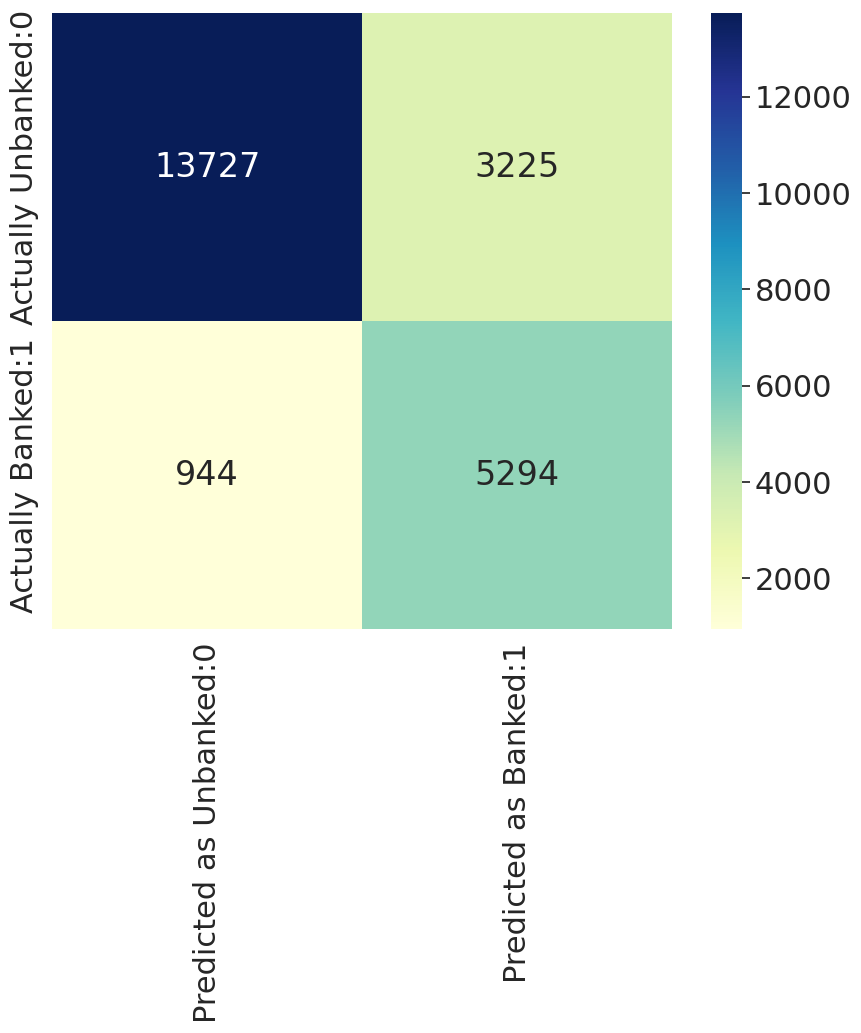

In [ ]:
conf_matrix=pd.DataFrame(data=confusion_matrix3,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

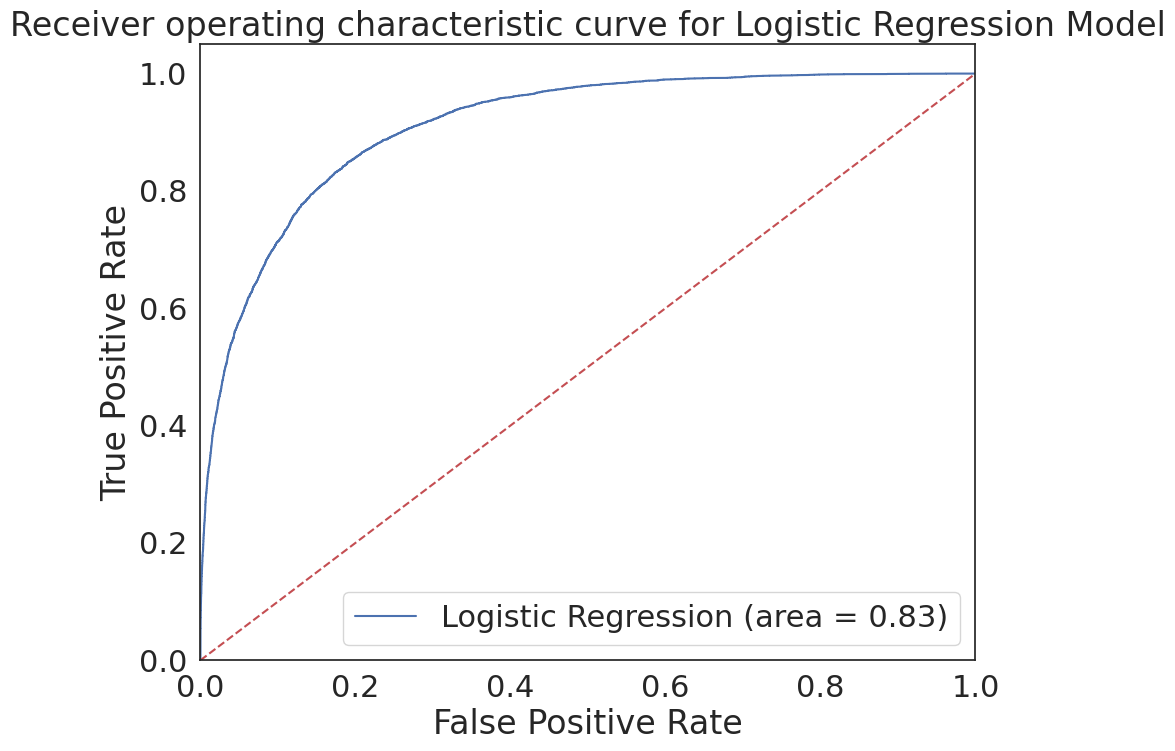

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg3.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print(classification_report(y_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     16952
           1       0.62      0.85      0.72      6238

    accuracy                           0.82     23190
   macro avg       0.78      0.83      0.79     23190
weighted avg       0.85      0.82      0.83     23190



1.x - Logistic Regression Model Measure - Using Over-sampled Data

In [ ]:
perf_measure(y_test, y_smote_pred)

Sensitivity, Recall, or True Positive Rate - TPR: 0.85
Specificity or True Negative Rate - TNR:          0.81
Precision or Positive Predictive Value - PPV:     0.62
Negative Predictive Value - NPV:                  0.94
Fall Out or False Positive Rate - FPR:            0.19
False Negative Rate - FNR:                        0.15
False Discovery Rate - FDR:                       0.38
Overall Accuracy - ACC:                           0.82


(0.849, 0.81, 0.621, 0.936, 0.19, 0.379, 0.82)

### Model 2. Using Naive Baise

Still Working with our undersampled data


In [ ]:
reload_dataset()

Random under-sampling:
0    25026
1    25026
Name: Bank_Status, dtype: int64


,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,Bank_Status,...,Marital_status_Single,Marital_status_Widowed,Employment_Status_Employed part-time,Employment_Status_Housewife,Employment_Status_NYSC,Employment_Status_Others,Employment_Status_Pensioner/Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed
55100,2,70,4,4,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
61942,1,20,1,4,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
34705,3,18,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
89664,3,20,1,4,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
89818,3,35,6,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92754,3,25,7,6,1,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
92755,1,46,8,2,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92756,3,60,8,5,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
92757,1,58,8,4,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Re preparing the dataset - for - Naive Bias Model

In [ ]:
X = df_encoded_under.loc[:, df_encoded_under.columns != 'Bank_Status']
y = df_encoded_under.loc[:, df_encoded_under.columns == 'Bank_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7453847998081995


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_gauss = confusion_matrix(y_test, y_pred)
print(confusion_matrix_gauss)

[[5021 1265]
 [1921 4306]]


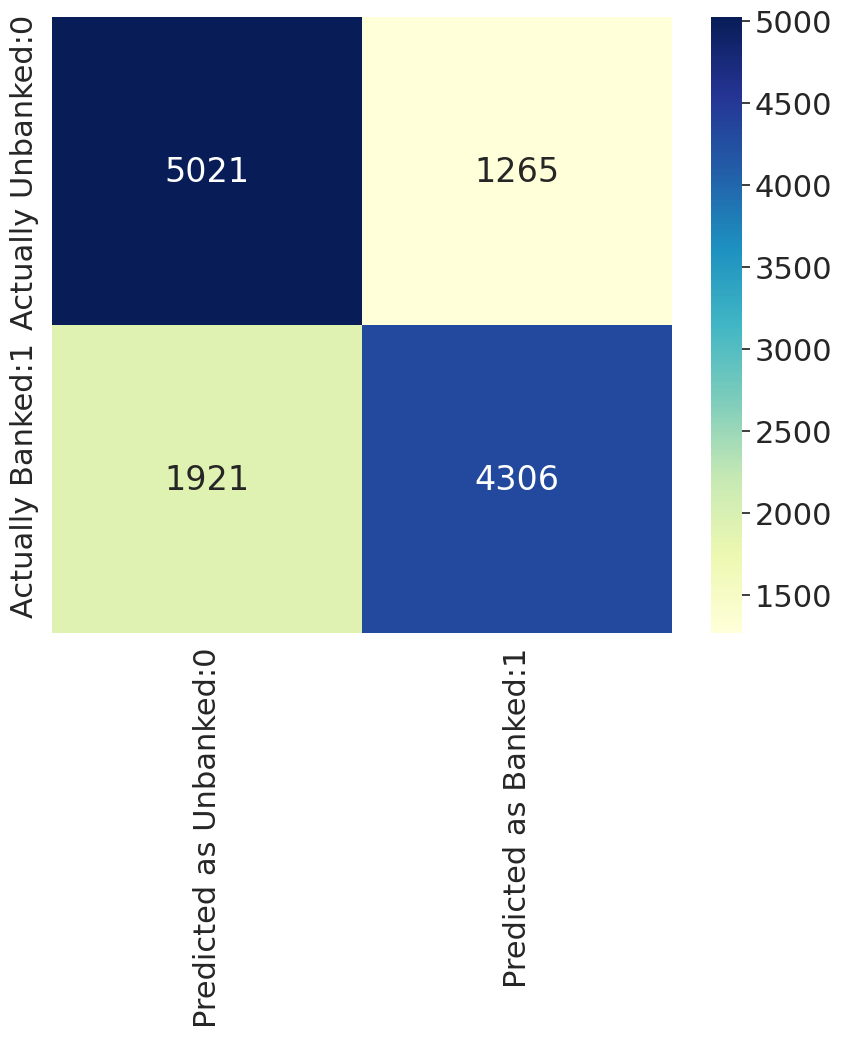

In [ ]:
conf_matrix_gauss =pd.DataFrame(data=confusion_matrix_gauss,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix_gauss, annot=True,fmt='d',cmap="YlGnBu");

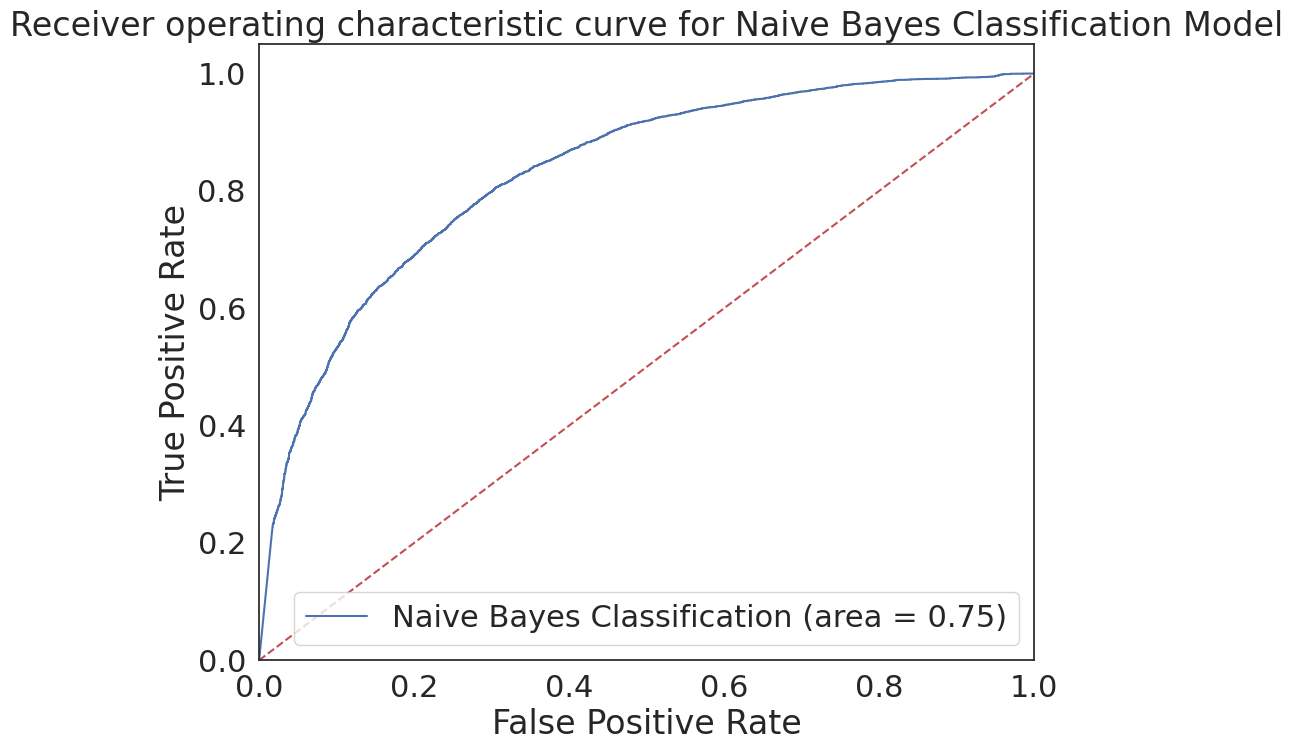

In [ ]:
Y_gnb_score = gnb.predict_proba(X_test)

gnb_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, Y_gnb_score[:, 1])
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Naive Bayes Classification (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Naive Bayes Classification Model')
plt.legend(loc="lower right")
plt.savefig('NBG_ROC')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6286
           1       0.77      0.69      0.73      6227

    accuracy                           0.75     12513
   macro avg       0.75      0.75      0.74     12513
weighted avg       0.75      0.75      0.74     12513



In [ ]:
perf_measure(y_test, y_pred)

Sensitivity, Recall, or True Positive Rate - TPR: 0.69
Specificity or True Negative Rate - TNR:          0.80
Precision or Positive Predictive Value - PPV:     0.77
Negative Predictive Value - NPV:                  0.72
Fall Out or False Positive Rate - FPR:            0.20
False Negative Rate - FNR:                        0.31
False Discovery Rate - FDR:                       0.23
Overall Accuracy - ACC:                           0.74


(0.692, 0.799, 0.773, 0.723, 0.201, 0.227, 0.745)

### Model 3. Extreme Gradient Boosting - xGBoost Model

Random under-sampling:
0    25026
1    25026
Name: Bank_Status, dtype: int64


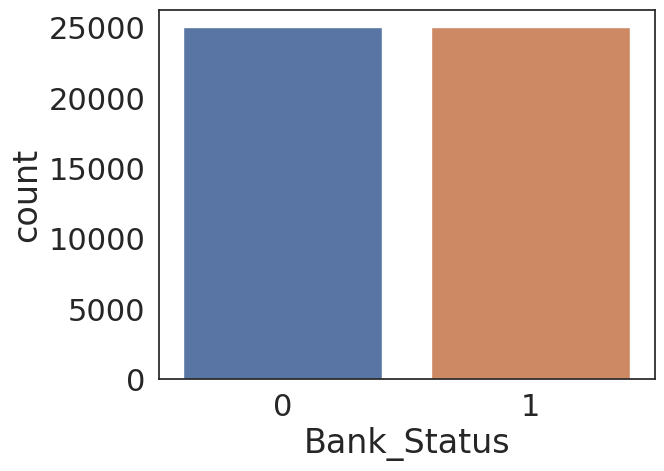

In [ ]:
#Loading the data
sns.countplot(x='Bank_Status', data=df_encoded_under)
df_encoded_under = reload_dataset()
df_encoded_under.reset_index(drop=True, inplace=True)

In [ ]:
type(df_encoded_under)

pandas.core.frame.DataFrame

<Axes: xlabel='Bank_Status', ylabel='count'>

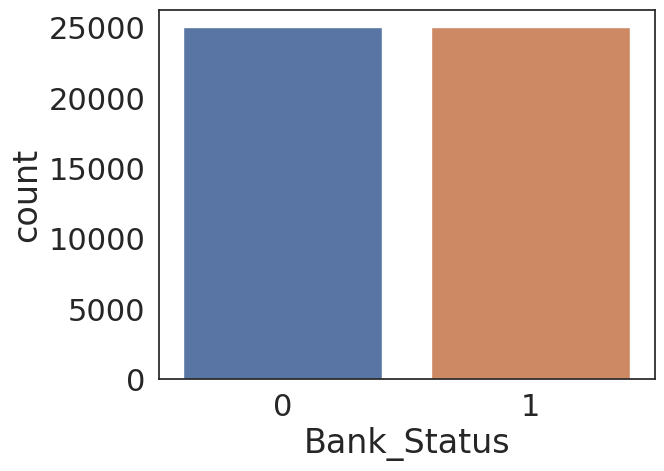

In [ ]:
sns.countplot(x='Bank_Status', data=df_encoded_under)

In [ ]:
X = df_encoded_under.loc[:, df_encoded_under.columns != 'Bank_Status']
y = df_encoded_under.loc[:, df_encoded_under.columns == 'Bank_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

In [ ]:
# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.8359306321425717

In [ ]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.8359306321425717


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_xgb = confusion_matrix(y_test, preds)
print(confusion_matrix_xgb)

[[5178 1108]
 [ 945 5282]]


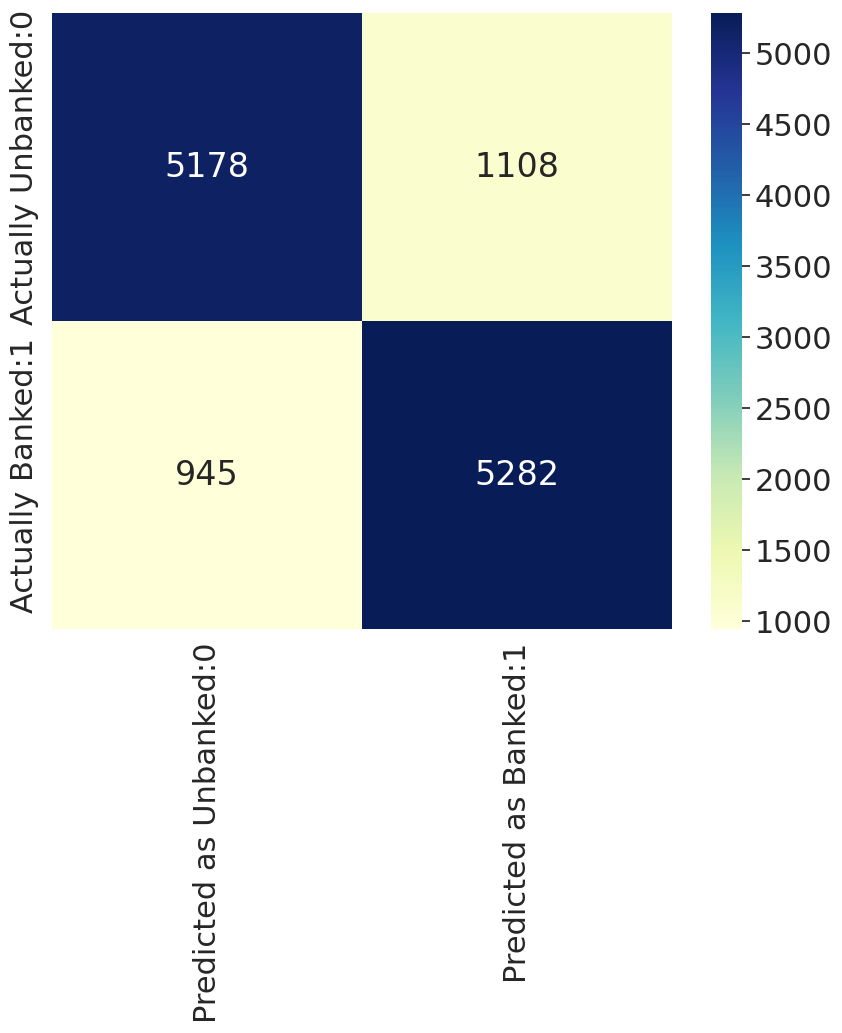

In [ ]:
conf_matrix_xgb =pd.DataFrame(data=confusion_matrix_xgb,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix_xgb, annot=True,fmt='d',cmap="YlGnBu");

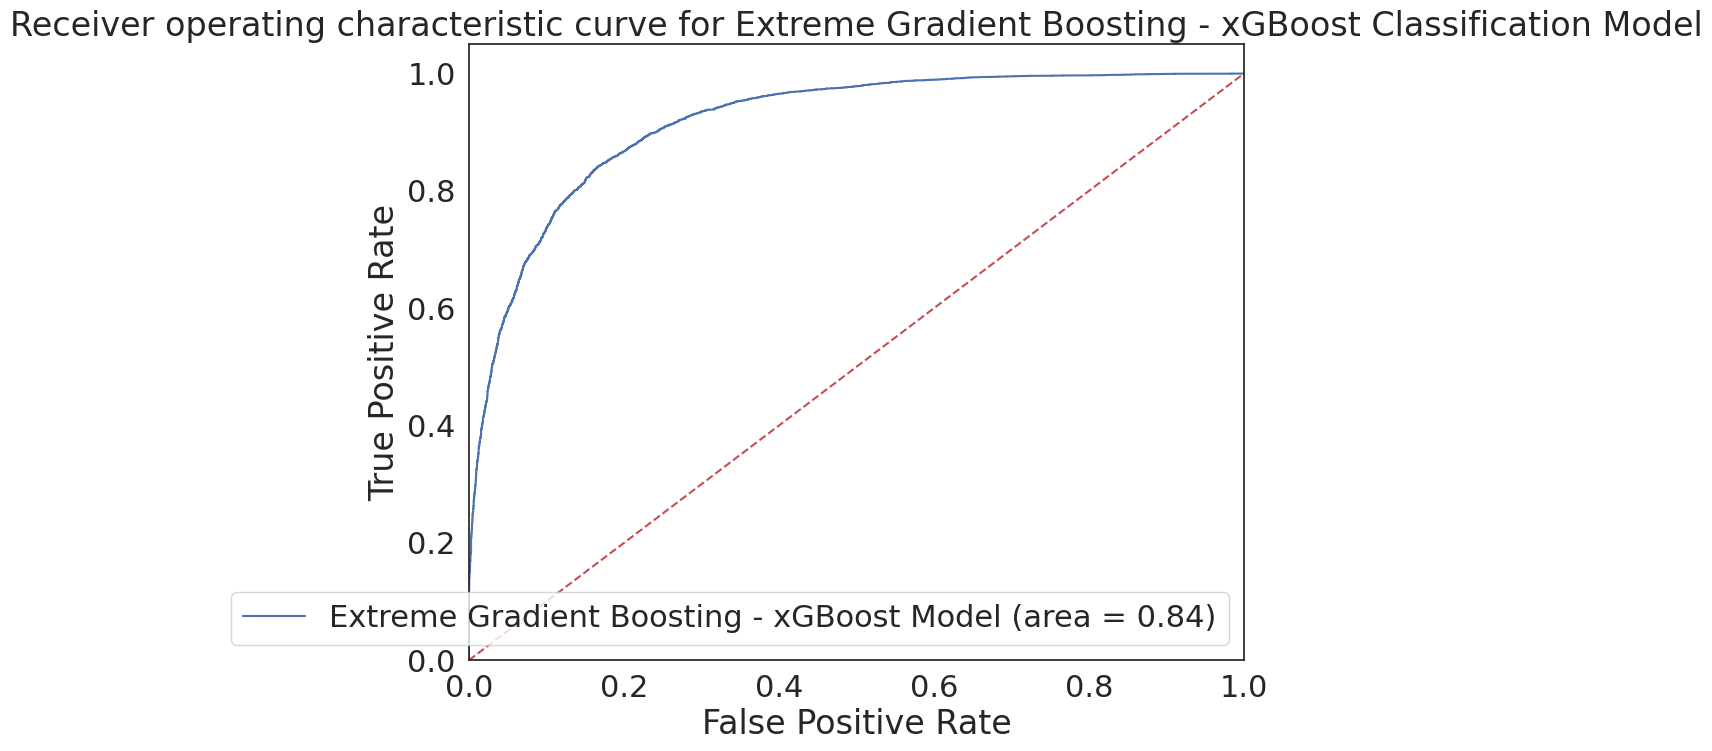

In [ ]:
Y_xgb_score = xgb_cl.predict_proba(X_test)

xgb_roc_auc = roc_auc_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, Y_xgb_score[:, 1])
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Extreme Gradient Boosting - xGBoost Model (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Extreme Gradient Boosting - xGBoost Classification Model')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046022 sha256=996fc4b5ef0a5c7629d44753039784638d8324565f16ba5081902c22e823c178
  Stored in directory: /root/.cache/pip/wheels/3e/dc/80/530757389f7587f2b1cd02e5a0a11dd986b232b06eacebcf8d
Successfully built dalex


In [ ]:
import dalex as dx
dx.__version__

'1.6.0'



```
# This is formatted as code
```


## create an explainer for the model¶

In [ ]:
exp = dx.Explainer(xgb_cl, X, y)

Preparation of a new explainer is initiated

  -> data              : 50052 rows 62 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 50052 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f4780522af0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000104, mean = 0.5, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.998, mean = -0.000453, max = 0.998
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
vi = exp.model_parts()
vi.result

,variable,dropout_loss,label
0,_full_model_,0.056623,XGBClassifier
1,Employment_Status_NYSC,0.056623,XGBClassifier
2,Marital_status_Refused to answer,0.056623,XGBClassifier
3,Marital_status_Divorced,0.056792,XGBClassifier
4,State_Gombe,0.056815,XGBClassifier
...,...,...,...
59,Age,0.073999,XGBClassifier
60,Monthly_Income_Rank,0.075505,XGBClassifier
61,Access_to_Mobile_Phone,0.091729,XGBClassifier
62,Education_Level,0.134671,XGBClassifier


In [ ]:
exp.predict(X)
exp.model_parts().plot()

In [ ]:
exp.model_performance(model_type='classification').plot(geom='roc')


In [ ]:
exp.model_parts().plot()

In [ ]:
class Wrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, dmatrix):
        return self.model.predict(dmatrix)

In [ ]:
#exp.predict_parts(X.iloc[1000, :]).plot(min_max=[0,1])

In [ ]:
#df = df_encoded_under

In [ ]:
#(df_encoded_under.iloc[1,:])
#df.loc[df['Bank_Status'] == 1]

In [ ]:
#df.reset_index(drop=True, inplace=True)

In [ ]:
#df.loc[df['Bank_Status'] != 3]

In [ ]:
#print(X.iloc[3, :])
print(y.iloc[3, :])
X.iloc[[3, ],:]

Bank_Status    0
Name: 3, dtype: int64


,Residential_Area_Density,Age,Monthly_Income_Rank,Education_Level,Occupation_Score,Access_to_Mobile_Phone,Access_to_Personal_Computer,Access_to_Internet_or_Email,Access_to_Television,State_Adamawa,...,Marital_status_Single,Marital_status_Widowed,Employment_Status_Employed part-time,Employment_Status_Housewife,Employment_Status_NYSC,Employment_Status_Others,Employment_Status_Pensioner/Retired,Employment_Status_Self-employed,Employment_Status_Student,Employment_Status_Unemployed
3,2,40,7,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test1 = (X.iloc[[3, ],:])
#test1
#bd_test1 = exp.predict_parts(test1, type='break_down', label=test1.index[0])

bd_test1 = exp.predict_parts(test1, type='break_down', label=test1.index[0])
bd_interactions_test1 = exp.predict_parts(test1, type='break_down_interactions', label="Bank_Status0")
#
#bd_test1.result

In [ ]:
#exp.predict_parts(X.iloc[0, :]).plot(min_max=[0,1])
bd_test1.plot(bd_interactions_test1)

ValueError: ignored

In [ ]:
print(X.iloc[50027, :])
print(y.iloc[50027, :])
X.iloc[[50027],:]

In [ ]:
df_encoded_under.iloc[[50027, 50036],:]

In [ ]:
X.tail(25)

In [ ]:
# plot single tree
# from sklearn import tree

# tree.plot_tree(xgb_cl.fit(X_train, y_train))
# plt.show()

In [ ]:
print(classification_report(y_test, preds))

In [ ]:
perf_measure(y_test, preds)

In [ ]:
hyhjhjh

### Warning do not Run ###

*** Optimizing the model using GridSearch ***

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
## grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
## _ = grid_cv.fit(X, y)

In [ ]:
#grid_cv.best_score_

In [ ]:
#grid_cv.best_params_

In [ ]:
best_params_0 = {'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [ ]:
best_params_1= {'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
best_params_1

In [ ]:
final_cl = xgb.XGBClassifier(base_score=0.5, gamma=0,
              learning_rate=0.05, max_depth=3,
              reg_lambda=0, scale_pos_weight=1, subsample=0.8)

In [ ]:
from sklearn.metrics import roc_auc_score
_ = final_cl.fit(X_train, y_train)
preds2 = final_cl.predict(X_test)

In [ ]:
# Score
accuracy_score(y_test, preds)

In [ ]:
confusion_matrix_xgb2 = confusion_matrix(y_test, preds)
print(confusion_matrix_xgb2)

In [ ]:
# conf_matrix_xgb2 =pd.DataFrame(data=confusion_matrix_xgb2,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
# plt.figure(figsize = (10,8))
# sns.heatmap(conf_matrix_xgb2, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
# Y_xgb_score2 = final_cl.predict_proba(X_test)

# xgb_roc_auc2 = roc_auc_score(y_test, preds2)
# fpr, tpr, thresholds = roc_curve(y_test, Y_xgb_score2[:, 1])
# plt.figure()
# plt.plot(fpr, tpr, label='Extreme Gradient Boosting - xGBoost Model (area = %0.2f)' % xgb_roc_auc2)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic curve for Extreme Gradient Boosting - xGBoost Classification Model')
# plt.legend(loc="lower right")
# plt.savefig('XGB_ROC')
# plt.show()

In [ ]:
# print(classification_report(y_test, preds2))

In [ ]:
# perf_measure(y_test, preds2)

### Model 4. Neural Network Using TensorFlow

### DNN Model with TensorFlow and Keras ##

In [ ]:
#Loading the data
cleaned_df = reload_dataset()

In [ ]:
cleaned_df.head()

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Bank_Status'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Bank_Status'))
test_labels = np.array(test_df.pop('Bank_Status'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

## Define the model and metrics

Define a function that creates a simple neural network with a densly connected hidden layer, a dropout layer to reduce overfitting, and an output sigmoid layer that returns the probability of a transaction being fraudulent:

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
#Build the Model
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

In [ ]:
model.predict(train_features[:10])

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

In [ ]:
model = make_model()
#model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

In [ ]:
model = make_model()
#model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
#model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

## Check training history
In this section, you will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
plot_metrics(baseline_history)

## Evaluate metrics
You can use a confusion matrix to summarize the actual vs. predicted labels, where the X axis is the predicted label and the Y axis is the actual label:

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [ ]:
#test_labels
test_predictions_baseline

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_nn = confusion_matrix(test_labels, test_predictions_baseline >= 0.5)
print(confusion_matrix_nn)

In [ ]:
conf_matrix_nn =pd.DataFrame(data=confusion_matrix_nn,columns=['Predicted as Unbanked:0','Predicted as Banked:1'],index=['Actually Unbanked:0','Actually Banked:1'])
plt.figure(figsize = (10,8))
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix_nn, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(classification_report(test_labels, test_predictions_baseline >= 0.5))

In [ ]:
perf_measure(test_labels, test_predictions_baseline >= 0.5)

In [ ]:
Y_nn_score = (test_predictions_baseline >= 0.5)

nn_roc_auc = roc_auc_score(test_labels, test_predictions_baseline >= 0.5)
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions_baseline)
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='TensorFlow Neural Network Model (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for TensorFlow Neural Network Model')
plt.legend(loc="lower right")
plt.savefig('NN_ROC')
plt.show()

## Plot the ROC
Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[3], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### ***************************************** End ********************************************* ###